In [1]:
import numpy as np
from numpy.linalg import inv
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns

In [2]:
# Vole network

Edges=[[1418, 1437], [1418, 1433], [1418, 1438], [1419, 1345], [1439, 1440], [1439, 1438], [1439, 1441], [1442, 1395], [1442, 1443], [1442, 1444], [1442, 1445], [1442, 1386], [1442, 1249], [1446, 1447], [1446, 1448], [1446, 1436], [1446, 1449], [1446, 1450], [1446, 1451], [1452, 1433], [1445, 1453], [1445, 1230], [1445, 1385], [1454, 1435], [1454, 1370], [1454, 1455], [1454, 1429], [1440, 1453], [1440, 1438], [1440, 1345], [1440, 1441], [1345, 1453], [1421, 1447], [1421, 1256], [1449, 1447], [1449, 1448], [1449, 1436], [1449, 1450], [1449, 1451], [1370, 1435], [1370, 1230], [1370, 1429], [1370, 1455], [1230, 1430], [1230, 1385], [1430, 1435], [1430, 1412], [1430, 1385], [1451, 1447], [1451, 1365], [1451, 1448], [1451, 1436], [1451, 1256], [1451, 1450], [1397, 1365], [1397, 1389], [1397, 1436], [1397, 1256], [1397, 1367], [1443, 1395], [1365, 1389], [1365, 1256], [1365, 1367], [1444, 1386], [1438, 1456], [1438, 1441], [1438, 1433], [1385, 1453], [1367, 1389], [1367, 1436], [1367, 1256], [1367, 1457], [1458, 1354], [1458, 1437], [1458, 1459], [1453, 1456], [1453, 1354], [1456, 1433], [1456, 1354], [1460, 1412], [1450, 1447], [1450, 1448], [1450, 1436], [1437, 1354], [1437, 1459], [1461, 1249], [1447, 1448], [1447, 1436], [1447, 1256], [1395, 1249], [1457, 1358], [1457, 1389], [1448, 1436], [1354, 1459], [1389, 1358], [1389, 1462], [1389, 1256], [1389, 1259], [1259, 1462], [1412, 1415], [1358, 1415], [1429, 1435], [1429, 1455], [1436, 1256], [1435, 1455]]

In [3]:
# # Dolphin network

# Edges=[[11, 1], [15, 1], [16, 1], [41, 1], [43, 1], [48, 1], [18, 2], [20, 2], [27, 2], [28, 2], [29, 2], [37, 2], [42, 2], [55, 2], [11, 3], [43, 3], [45, 3], [62, 3], [9, 4], [15, 4], [60, 4], [52, 5], [10, 6], [14, 6], [57, 6], [58, 6], [10, 7], [14, 7], [18, 7], [55, 7], [57, 7], [58, 7], [20, 8], [28, 8], [31, 8], [41, 8], [55, 8], [21, 9], [29, 9], [38, 9], [46, 9], [60, 9], [14, 10], [18, 10], [33, 10], [42, 10], [58, 10], [30, 11], [43, 11], [48, 11], [52, 12], [34, 13], [18, 14], [33, 14], [42, 14], [55, 14], [58, 14], [17, 15], [25, 15], [34, 15], [35, 15], [38, 15], [39, 15], [41, 15], [44, 15], [51, 15], [53, 15], [19, 16], [25, 16], [41, 16], [46, 16], [56, 16], [60, 16], [21, 17], [34, 17], [38, 17], [39, 17], [51, 17], [23, 18], [26, 18], [28, 18], [32, 18], [58, 18], [21, 19], [22, 19], [25, 19], [30, 19], [46, 19], [52, 19], [31, 20], [55, 20], [29, 21], [37, 21], [39, 21], [45, 21], [48, 21], [51, 21], [30, 22], [34, 22], [38, 22], [46, 22], [52, 22], [37, 24], [46, 24], [52, 24], [30, 25], [46, 25], [52, 25], [27, 26], [28, 26], [28, 27], [31, 29], [48, 29], [36, 30], [44, 30], [46, 30], [52, 30], [53, 30], [43, 31], [48, 31], [61, 33], [35, 34], [38, 34], [39, 34], [41, 34], [44, 34], [51, 34], [38, 35], [45, 35], [50, 35], [38, 37], [40, 37], [41, 37], [60, 37], [41, 38], [44, 38], [46, 38], [62, 38], [44, 39], [45, 39], [53, 39], [59, 39], [58, 40], [53, 41], [55, 42], [58, 42], [48, 43], [51, 43], [47, 44], [54, 44], [51, 46], [52, 46], [60, 46], [50, 47], [58, 49], [52, 51], [56, 52], [62, 54], [58, 55]]

In [4]:
# # Enron network

# Edges=[[17, 1], [72, 1], [3, 2], [19, 2], [20, 2], [27, 2], [29, 2], [31, 2], [48, 2], [65, 2], [67, 2], [69, 2], [71, 2], [132, 2], [136, 2], [4, 3], [19, 3], [20, 3], [28, 3], [31, 3], [65, 3], [67, 3], [69, 3], [71, 3], [132, 3], [136, 3], [19, 4], [20, 4], [27, 4], [29, 4], [31, 4], [54, 4], [69, 4], [71, 4], [132, 4], [136, 4], [22, 5], [72, 5], [9, 6], [13, 6], [16, 6], [26, 6], [47, 6], [49, 6], [64, 6], [66, 6], [105, 6], [11, 7], [12, 7], [24, 7], [74, 7], [75, 7], [112, 8], [124, 8], [13, 9], [47, 9], [49, 9], [51, 9], [56, 9], [66, 9], [74, 9], [75, 9], [78, 9], [91, 9], [139, 9], [17, 10], [21, 10], [37, 10], [53, 10], [70, 10], [72, 10], [122, 10], [124, 10], [12, 11], [17, 11], [32, 11], [37, 11], [74, 11], [124, 11], [137, 11], [32, 12], [37, 12], [74, 12], [75, 12], [26, 13], [32, 13], [47, 13], [49, 13], [56, 13], [66, 13], [75, 13], [105, 13], [139, 13], [16, 14], [22, 14], [26, 14], [50, 14], [64, 14], [68, 14], [72, 14], [73, 14], [132, 14], [85, 15], [26, 16], [47, 16], [50, 16], [64, 16], [73, 16], [105, 16], [107, 16], [122, 16], [21, 17], [24, 17], [25, 17], [32, 17], [36, 17], [37, 17], [39, 17], [40, 17], [41, 17], [43, 17], [48, 17], [55, 17], [58, 17], [60, 17], [61, 17], [70, 17], [76, 17], [82, 17], [95, 17], [101, 17], [104, 17], [105, 17], [115, 17], [121, 17], [122, 17], [124, 17], [128, 17], [19, 18], [20, 18], [27, 18], [29, 18], [31, 18], [48, 18], [65, 18], [67, 18], [69, 18], [132, 18], [20, 19], [27, 19], [28, 19], [29, 19], [31, 19], [48, 19], [54, 19], [67, 19], [69, 19], [71, 19], [132, 19], [136, 19], [27, 20], [28, 20], [29, 20], [31, 20], [54, 20], [65, 20], [67, 20], [69, 20], [71, 20], [107, 20], [132, 20], [136, 20], [70, 21], [83, 21], [105, 21], [124, 21], [31, 22], [38, 22], [48, 22], [50, 22], [64, 22], [68, 22], [72, 22], [91, 22], [105, 22], [111, 22], [126, 22], [140, 22], [33, 23], [87, 23], [91, 23], [111, 23], [120, 23], [25, 24], [39, 24], [58, 24], [60, 24], [122, 24], [124, 24], [55, 25], [60, 25], [47, 26], [51, 26], [64, 26], [74, 26], [91, 26], [105, 26], [139, 26], [31, 27], [48, 27], [69, 27], [71, 27], [136, 27], [31, 28], [65, 28], [67, 28], [69, 28], [123, 28], [132, 28], [136, 28], [54, 29], [67, 29], [69, 29], [71, 29], [132, 29], [136, 29], [38, 30], [44, 30], [65, 30], [123, 30], [48, 31], [50, 31], [65, 31], [67, 31], [69, 31], [72, 31], [132, 31], [134, 31], [136, 31], [37, 32], [40, 32], [43, 32], [49, 32], [55, 32], [56, 32], [66, 32], [74, 32], [75, 32], [103, 32], [124, 32], [137, 32], [141, 32], [34, 33], [120, 33], [81, 34], [120, 34], [43, 35], [50, 35], [53, 35], [76, 35], [77, 35], [105, 35], [107, 35], [119, 35], [123, 35], [125, 35], [37, 36], [39, 36], [58, 36], [60, 36], [89, 36], [40, 37], [56, 37], [72, 37], [74, 37], [100, 37], [105, 37], [115, 37], [137, 37], [91, 38], [40, 39], [41, 39], [48, 39], [58, 39], [60, 39], [70, 39], [60, 40], [59, 41], [60, 41], [104, 41], [115, 41], [121, 41], [122, 41], [81, 42], [52, 43], [53, 43], [61, 43], [77, 43], [90, 43], [91, 43], [95, 43], [99, 43], [100, 43], [101, 43], [103, 43], [105, 43], [109, 43], [117, 43], [122, 43], [142, 43], [77, 44], [78, 44], [105, 44], [68, 45], [105, 45], [118, 45], [119, 45], [95, 46], [100, 46], [108, 46], [49, 47], [51, 47], [56, 47], [66, 47], [67, 47], [77, 47], [90, 47], [105, 47], [131, 47], [137, 47], [139, 47], [58, 48], [60, 48], [69, 48], [72, 48], [74, 48], [90, 48], [91, 48], [99, 48], [101, 48], [121, 48], [132, 48], [136, 48], [51, 49], [56, 49], [66, 49], [75, 49], [139, 49], [53, 50], [64, 50], [65, 50], [68, 50], [72, 50], [105, 50], [107, 50], [118, 50], [123, 50], [142, 50], [143, 50], [66, 51], [75, 51], [94, 51], [112, 51], [130, 51], [132, 51], [139, 51], [105, 52], [57, 53], [63, 53], [64, 53], [77, 53], [105, 53], [118, 53], [119, 53], [123, 53], [125, 53], [142, 53], [69, 54], [71, 54], [136, 54], [60, 55], [66, 56], [74, 56], [75, 56], [90, 56], [95, 56], [105, 56], [122, 56], [137, 56], [74, 57], [95, 57], [102, 57], [105, 57], [117, 57], [121, 57], [60, 58], [70, 58], [104, 58], [115, 58], [75, 59], [137, 59], [104, 60], [115, 60], [121, 60], [124, 60], [95, 61], [101, 61], [105, 61], [121, 61], [95, 62], [112, 62], [73, 64], [74, 64], [105, 64], [132, 64], [142, 64], [143, 64], [67, 65], [73, 65], [118, 65], [123, 65], [125, 65], [132, 65], [136, 65], [95, 66], [131, 66], [139, 66], [69, 67], [71, 67], [118, 67], [125, 67], [132, 67], [136, 67], [72, 68], [91, 68], [105, 68], [123, 68], [125, 68], [134, 68], [143, 68], [71, 69], [72, 69], [136, 69], [79, 70], [124, 70], [136, 71], [105, 72], [132, 72], [134, 72], [135, 72], [136, 72], [143, 72], [123, 73], [125, 73], [132, 73], [143, 73], [75, 74], [94, 74], [105, 74], [108, 74], [114, 74], [132, 74], [137, 74], [95, 75], [97, 75], [131, 75], [137, 75], [139, 75], [89, 76], [100, 76], [105, 76], [115, 76], [82, 77], [99, 77], [100, 77], [101, 77], [105, 77], [109, 77], [142, 77], [91, 78], [105, 78], [111, 78], [118, 78], [124, 78], [90, 79], [102, 79], [121, 79], [112, 80], [91, 82], [95, 82], [115, 82], [116, 82], [120, 82], [90, 83], [104, 83], [105, 83], [122, 83], [86, 84], [127, 84], [130, 84], [141, 84], [86, 85], [113, 85], [126, 85], [129, 85], [130, 85], [133, 85], [134, 85], [141, 85], [113, 86], [129, 86], [130, 86], [141, 86], [111, 87], [116, 87], [95, 88], [112, 88], [99, 90], [101, 90], [109, 90], [105, 91], [107, 91], [111, 91], [116, 91], [120, 91], [122, 91], [128, 91], [142, 91], [141, 92], [100, 93], [109, 93], [102, 94], [112, 94], [121, 94], [100, 95], [101, 95], [102, 95], [105, 95], [108, 95], [109, 95], [112, 95], [117, 95], [118, 95], [122, 95], [124, 95], [142, 95], [126, 96], [128, 96], [105, 97], [130, 98], [101, 99], [104, 99], [109, 99], [110, 99], [124, 99], [109, 100], [115, 100], [117, 100], [124, 100], [103, 101], [105, 101], [109, 101], [118, 101], [105, 102], [114, 102], [117, 102], [121, 102], [122, 102], [109, 103], [117, 103], [110, 104], [121, 104], [124, 104], [107, 105], [111, 105], [117, 105], [118, 105], [119, 105], [122, 105], [123, 105], [125, 105], [139, 105], [142, 105], [111, 106], [115, 106], [116, 106], [120, 106], [118, 107], [119, 107], [125, 107], [112, 108], [122, 110], [124, 110], [138, 110], [124, 112], [121, 114], [120, 115], [119, 118], [123, 118], [125, 118], [142, 118], [143, 118], [123, 119], [143, 119], [137, 121], [142, 122], [125, 123], [143, 123], [138, 124], [129, 126], [130, 126], [130, 127], [141, 127], [130, 129], [134, 129], [141, 129], [141, 130], [137, 131], [136, 132], [141, 133], [135, 134], [140, 134], [143, 142]]

In [5]:
# # Jazz network

# Edges=[[8,1],[24,1],[35,1],[42,1],[46,1],[60,1],[74,1],[78,1],[81,1],[95,1],[98,1],[99,1],[100,1],[101,1],[103,1],[104,1],[108,1],[131,1],[132,1],[154,1],[159,1],[168,1],[171,1],[14,2],[54,2],[150,2],[115,3],[153,3],[167,3],[172,3],[5,4],[13,4],[26,4],[77,4],[85,4],[102,4],[138,4],[147,4],[153,4],[156,4],[167,4],[169,4],[172,4],[173,4],[176,4],[189,4],[13,5],[19,5],[21,5],[26,5],[27,5],[28,5],[29,5],[51,5],[53,5],[54,5],[57,5],[73,5],[75,5],[76,5],[77,5],[79,5],[85,5],[86,5],[90,5],[96,5],[97,5],[102,5],[124,5],[126,5],[128,5],[136,5],[138,5],[140,5],[144,5],[147,5],[149,5],[153,5],[155,5],[156,5],[163,5],[167,5],[169,5],[172,5],[173,5],[176,5],[189,5],[191,5],[194,5],[196,5],[197,5],[152,6],[157,6],[10,7],[11,7],[14,7],[19,7],[36,7],[49,7],[53,7],[55,7],[56,7],[57,7],[60,7],[61,7],[67,7],[69,7],[70,7],[71,7],[72,7],[74,7],[81,7],[83,7],[87,7],[93,7],[94,7],[95,7],[103,7],[108,7],[111,7],[112,7],[113,7],[114,7],[122,7],[125,7],[127,7],[129,7],[130,7],[132,7],[136,7],[141,7],[146,7],[150,7],[151,7],[158,7],[161,7],[164,7],[168,7],[170,7],[171,7],[177,7],[178,7],[185,7],[190,7],[192,7],[193,7],[194,7],[195,7],[196,7],[197,7],[35,8],[46,8],[60,8],[89,8],[95,8],[98,8],[99,8],[100,8],[101,8],[110,8],[118,8],[121,8],[131,8],[132,8],[136,8],[142,8],[154,8],[168,8],[171,8],[174,8],[11,9],[23,9],[32,9],[38,9],[71,9],[80,9],[111,9],[116,9],[117,9],[118,9],[121,9],[122,9],[135,9],[137,9],[139,9],[153,9],[162,9],[168,9],[179,9],[189,9],[11,10],[14,10],[49,10],[53,10],[57,10],[60,10],[61,10],[69,10],[70,10],[71,10],[74,10],[87,10],[103,10],[112,10],[113,10],[114,10],[127,10],[130,10],[141,10],[151,10],[158,10],[161,10],[164,10],[192,10],[195,10],[196,10],[23,11],[32,11],[38,11],[49,11],[53,11],[57,11],[71,11],[80,11],[112,11],[113,11],[114,11],[135,11],[139,11],[158,11],[161,11],[162,11],[164,11],[179,11],[189,11],[196,11],[18,12],[19,12],[31,12],[49,12],[53,12],[54,12],[55,12],[56,12],[57,12],[60,12],[61,12],[71,12],[73,12],[83,12],[114,12],[129,12],[170,12],[194,12],[195,12],[196,12],[197,12],[25,13],[26,13],[28,13],[73,13],[85,13],[86,13],[92,13],[102,13],[128,13],[140,13],[147,13],[148,13],[149,13],[153,13],[155,13],[156,13],[167,13],[169,13],[172,13],[173,13],[176,13],[189,13],[191,13],[54,14],[60,14],[61,14],[69,14],[70,14],[87,14],[96,14],[112,14],[114,14],[127,14],[130,14],[141,14],[150,14],[151,14],[158,14],[161,14],[164,14],[185,14],[186,14],[192,14],[194,14],[195,14],[16,15],[24,15],[48,15],[81,15],[91,15],[104,15],[105,15],[107,15],[24,16],[48,16],[78,16],[81,16],[91,16],[104,16],[105,16],[107,16],[62,17],[136,17],[19,18],[29,18],[31,18],[50,18],[53,18],[54,18],[55,18],[56,18],[57,18],[60,18],[61,18],[73,18],[77,18],[86,18],[88,18],[90,18],[96,18],[114,18],[128,18],[129,18],[131,18],[132,18],[136,18],[140,18],[147,18],[149,18],[158,18],[167,18],[172,18],[183,18],[184,18],[191,18],[194,18],[195,18],[196,18],[197,18],[20,19],[31,19],[49,19],[53,19],[54,19],[55,19],[56,19],[57,19],[60,19],[61,19],[70,19],[129,19],[130,19],[136,19],[185,19],[192,19],[194,19],[195,19],[196,19],[197,19],[24,20],[60,20],[70,20],[78,20],[80,20],[87,20],[136,20],[137,20],[158,20],[168,20],[43,22],[81,22],[83,22],[98,22],[99,22],[100,22],[101,22],[105,22],[108,22],[131,22],[132,22],[136,22],[164,22],[170,22],[174,22],[178,22],[182,22],[194,22],[197,22],[32,23],[38,23],[60,23],[80,23],[111,23],[135,23],[139,23],[162,23],[168,23],[179,23],[189,23],[35,24],[42,24],[43,24],[46,24],[48,24],[60,24],[74,24],[78,24],[80,24],[81,24],[91,24],[99,24],[100,24],[103,24],[104,24],[105,24],[107,24],[108,24],[132,24],[136,24],[154,24],[168,24],[171,24],[174,24],[182,24],[92,25],[117,25],[148,25],[149,25],[153,25],[28,26],[29,26],[73,26],[77,26],[85,26],[86,26],[90,26],[96,26],[102,26],[124,26],[128,26],[138,26],[140,26],[147,26],[149,26],[153,26],[155,26],[156,26],[167,26],[169,26],[172,26],[173,26],[176,26],[178,26],[184,26],[189,26],[191,26],[198,26],[29,27],[51,27],[76,27],[96,27],[126,27],[128,27],[144,27],[147,27],[149,27],[153,27],[167,27],[172,27],[29,28],[73,28],[77,28],[85,28],[86,28],[90,28],[96,28],[102,28],[124,28],[128,28],[138,28],[140,28],[147,28],[149,28],[153,28],[155,28],[156,28],[167,28],[172,28],[173,28],[176,28],[184,28],[189,28],[191,28],[198,28],[51,29],[73,29],[76,29],[77,29],[86,29],[88,29],[90,29],[96,29],[97,29],[124,29],[126,29],[128,29],[136,29],[138,29],[140,29],[144,29],[147,29],[149,29],[153,29],[167,29],[169,29],[172,29],[176,29],[184,29],[191,29],[198,29],[34,30],[32,31],[53,31],[54,31],[55,31],[56,31],[57,31],[60,31],[61,31],[106,31],[111,31],[123,31],[129,31],[170,31],[194,31],[195,31],[196,31],[197,31],[33,32],[35,32],[38,32],[40,32],[44,32],[58,32],[60,32],[61,32],[62,32],[63,32],[64,32],[65,32],[66,32],[80,32],[91,32],[98,32],[99,32],[100,32],[101,32],[105,32],[106,32],[107,32],[108,32],[109,32],[110,32],[111,32],[122,32],[123,32],[131,32],[132,32],[135,32],[139,32],[154,32],[162,32],[168,32],[179,32],[189,32],[35,33],[38,33],[40,33],[44,33],[58,33],[60,33],[62,33],[63,33],[64,33],[65,33],[66,33],[91,33],[98,33],[99,33],[100,33],[101,33],[105,33],[106,33],[107,33],[108,33],[109,33],[110,33],[116,33],[119,33],[122,33],[123,33],[131,33],[132,33],[134,33],[135,33],[154,33],[168,33],[179,33],[70,34],[83,34],[192,34],[40,35],[44,35],[46,35],[58,35],[60,35],[62,35],[63,35],[64,35],[65,35],[66,35],[68,35],[74,35],[78,35],[95,35],[98,35],[99,35],[100,35],[101,35],[103,35],[104,35],[105,35],[106,35],[107,35],[108,35],[109,35],[110,35],[122,35],[123,35],[131,35],[132,35],[135,35],[154,35],[166,35],[168,35],[170,35],[171,35],[179,35],[187,35],[49,36],[53,36],[54,36],[55,36],[56,36],[60,36],[67,36],[70,36],[72,36],[81,36],[83,36],[87,36],[129,36],[150,36],[158,36],[161,36],[164,36],[170,36],[174,36],[178,36],[192,36],[194,36],[195,36],[196,36],[197,36],[90,37],[133,37],[153,37],[155,37],[180,37],[40,38],[44,38],[63,38],[80,38],[91,38],[105,38],[116,38],[119,38],[134,38],[135,38],[139,38],[162,38],[179,38],[189,38],[51,39],[80,39],[116,39],[149,39],[153,39],[181,39],[44,40],[58,40],[60,40],[62,40],[63,40],[64,40],[65,40],[66,40],[91,40],[98,40],[99,40],[100,40],[101,40],[105,40],[106,40],[107,40],[108,40],[109,40],[110,40],[116,40],[119,40],[122,40],[123,40],[131,40],[132,40],[134,40],[135,40],[154,40],[168,40],[179,40],[45,41],[77,41],[86,41],[88,41],[96,41],[97,41],[136,41],[46,42],[50,42],[81,42],[104,42],[106,42],[123,42],[136,42],[159,42],[182,42],[183,42],[59,43],[78,43],[81,43],[82,43],[83,43],[98,43],[99,43],[100,43],[101,43],[105,43],[108,43],[118,43],[121,43],[122,43],[131,43],[132,43],[136,43],[143,43],[158,43],[162,43],[164,43],[170,43],[174,43],[178,43],[182,43],[194,43],[197,43],[50,44],[58,44],[60,44],[62,44],[63,44],[64,44],[65,44],[66,44],[68,44],[91,44],[98,44],[99,44],[100,44],[101,44],[105,44],[106,44],[107,44],[108,44],[109,44],[110,44],[122,44],[123,44],[131,44],[132,44],[135,44],[139,44],[154,44],[166,44],[168,44],[171,44],[179,44],[187,44],[77,45],[86,45],[88,45],[96,45],[97,45],[136,45],[50,46],[60,46],[81,46],[95,46],[98,46],[99,46],[100,46],[101,46],[104,46],[106,46],[123,46],[131,46],[132,46],[154,46],[159,46],[168,46],[171,46],[183,46],[155,47],[167,47],[180,47],[81,48],[91,48],[104,48],[105,48],[107,48],[52,49],[53,49],[54,49],[57,49],[60,49],[67,49],[69,49],[70,49],[71,49],[79,49],[83,49],[90,49],[112,49],[113,49],[114,49],[118,49],[121,49],[125,49],[127,49],[130,49],[136,49],[142,49],[143,49],[149,49],[150,49],[158,49],[161,49],[162,49],[164,49],[174,49],[178,49],[185,49],[192,49],[194,49],[195,49],[196,49],[53,50],[56,50],[60,50],[64,50],[65,50],[66,50],[68,50],[81,50],[88,50],[106,50],[110,50],[111,50],[114,50],[123,50],[131,50],[132,50],[139,50],[158,50],[166,50],[168,50],[179,50],[183,50],[196,50],[75,51],[76,51],[79,51],[96,51],[126,51],[128,51],[136,51],[144,51],[147,51],[149,51],[153,51],[167,51],[172,51],[174,51],[181,51],[53,52],[60,52],[83,52],[88,52],[196,52],[54,53],[55,53],[56,53],[57,53],[60,53],[61,53],[67,53],[71,53],[81,53],[83,53],[88,53],[111,53],[112,53],[113,53],[114,53],[129,53],[131,53],[132,53],[149,53],[150,53],[158,53],[161,53],[164,53],[170,53],[178,53],[183,53],[194,53],[195,53],[196,53],[197,53],[55,54],[56,54],[57,54],[60,54],[61,54],[67,54],[69,54],[70,54],[83,54],[87,54],[93,54],[94,54],[96,54],[111,54],[125,54],[129,54],[130,54],[146,54],[149,54],[150,54],[158,54],[161,54],[164,54],[168,54],[170,54],[174,54],[177,54],[178,54],[186,54],[190,54],[192,54],[193,54],[194,54],[195,54],[196,54],[197,54],[56,55],[57,55],[60,55],[61,55],[67,55],[81,55],[83,55],[129,55],[150,55],[158,55],[164,55],[170,55],[178,55],[194,55],[195,55],[196,55],[197,55],[57,56],[60,56],[61,56],[67,56],[81,56],[83,56],[88,56],[111,56],[114,56],[129,56],[131,56],[132,56],[150,56],[158,56],[164,56],[170,56],[178,56],[183,56],[194,56],[195,56],[196,56],[197,56],[60,57],[61,57],[70,57],[71,57],[83,57],[89,57],[111,57],[112,57],[113,57],[114,57],[121,57],[129,57],[130,57],[136,57],[142,57],[158,57],[161,57],[164,57],[185,57],[192,57],[194,57],[195,57],[196,57],[197,57],[60,58],[62,58],[63,58],[64,58],[65,58],[66,58],[98,58],[99,58],[100,58],[101,58],[105,58],[106,58],[107,58],[108,58],[109,58],[110,58],[122,58],[123,58],[131,58],[132,58],[135,58],[154,58],[162,58],[168,58],[179,58],[187,58],[188,58],[82,59],[99,59],[100,59],[118,59],[121,59],[122,59],[136,59],[143,59],[158,59],[162,59],[174,59],[61,60],[62,60],[63,60],[64,60],[65,60],[66,60],[68,60],[69,60],[70,60],[72,60],[78,60],[80,60],[81,60],[83,60],[88,60],[89,60],[91,60],[93,60],[94,60],[95,60],[98,60],[99,60],[100,60],[101,60],[105,60],[106,60],[107,60],[108,60],[109,60],[110,60],[111,60],[112,60],[114,60],[118,60],[121,60],[122,60],[123,60],[125,60],[127,60],[129,60],[130,60],[131,60],[132,60],[135,60],[136,60],[141,60],[142,60],[146,60],[150,60],[151,60],[154,60],[158,60],[161,60],[164,60],[166,60],[168,60],[171,60],[174,60],[179,60],[183,60],[187,60],[190,60],[192,60],[193,60],[194,60],[195,60],[196,60],[197,60],[69,61],[70,61],[106,61],[111,61],[112,61],[114,61],[123,61],[127,61],[129,61],[130,61],[141,61],[151,61],[158,61],[177,61],[192,61],[194,61],[195,61],[196,61],[197,61],[63,62],[64,62],[65,62],[66,62],[98,62],[99,62],[100,62],[101,62],[105,62],[106,62],[107,62],[108,62],[109,62],[110,62],[122,62],[123,62],[131,62],[132,62],[135,62],[154,62],[168,62],[179,62],[64,63],[65,63],[66,63],[91,63],[98,63],[99,63],[100,63],[101,63],[105,63],[106,63],[107,63],[108,63],[109,63],[110,63],[122,63],[123,63],[131,63],[132,63],[135,63],[154,63],[168,63],[179,63],[65,64],[66,64],[98,64],[99,64],[100,64],[101,64],[105,64],[106,64],[107,64],[108,64],[109,64],[110,64],[122,64],[123,64],[131,64],[132,64],[135,64],[139,64],[154,64],[168,64],[170,64],[179,64],[66,65],[98,65],[99,65],[100,65],[101,65],[105,65],[106,65],[107,65],[108,65],[109,65],[110,65],[122,65],[123,65],[131,65],[132,65],[135,65],[136,65],[139,65],[154,65],[168,65],[170,65],[179,65],[98,66],[99,66],[100,66],[101,66],[105,66],[106,66],[107,66],[108,66],[109,66],[110,66],[122,66],[123,66],[131,66],[132,66],[135,66],[136,66],[139,66],[154,66],[168,66],[170,66],[179,66],[182,66],[70,67],[81,67],[83,67],[84,67],[87,67],[103,67],[127,67],[134,67],[135,67],[136,67],[149,67],[150,67],[158,67],[159,67],[164,67],[170,67],[174,67],[178,67],[192,67],[194,67],[195,67],[196,67],[99,68],[101,68],[132,68],[135,68],[154,68],[166,68],[168,68],[171,68],[183,68],[187,68],[70,69],[73,69],[86,69],[87,69],[88,69],[90,69],[93,69],[94,69],[95,69],[96,69],[99,69],[108,69],[109,69],[110,69],[111,69],[112,69],[114,69],[118,69],[121,69],[122,69],[125,69],[127,69],[130,69],[132,69],[136,69],[141,69],[142,69],[143,69],[146,69],[150,69],[151,69],[158,69],[161,69],[164,69],[168,69],[171,69],[174,69],[175,69],[177,69],[183,69],[186,69],[190,69],[192,69],[193,69],[194,69],[195,69],[73,70],[83,70],[86,70],[87,70],[88,70],[93,70],[94,70],[95,70],[96,70],[99,70],[108,70],[110,70],[111,70],[112,70],[114,70],[118,70],[121,70],[122,70],[125,70],[127,70],[130,70],[132,70],[136,70],[141,70],[142,70],[143,70],[146,70],[150,70],[151,70],[158,70],[161,70],[164,70],[167,70],[168,70],[170,70],[171,70],[174,70],[175,70],[177,70],[178,70],[183,70],[185,70],[186,70],[190,70],[192,70],[193,70],[194,70],[195,70],[72,71],[74,71],[83,71],[103,71],[111,71],[112,71],[113,71],[114,71],[116,71],[117,71],[118,71],[121,71],[122,71],[137,71],[150,71],[153,71],[158,71],[161,71],[164,71],[168,71],[195,71],[196,71],[74,72],[103,72],[150,72],[161,72],[164,72],[77,73],[85,73],[86,73],[88,73],[90,73],[96,73],[99,73],[110,73],[128,73],[136,73],[140,73],[143,73],[147,73],[149,73],[155,73],[156,73],[167,73],[172,73],[174,73],[184,73],[189,73],[191,73],[78,74],[87,74],[103,74],[104,74],[108,74],[112,74],[114,74],[150,74],[154,74],[161,74],[164,74],[168,74],[171,74],[76,75],[79,75],[86,75],[96,75],[126,75],[128,75],[136,75],[144,75],[147,75],[149,75],[163,75],[167,75],[172,75],[174,75],[198,75],[79,76],[96,76],[126,76],[128,76],[136,76],[144,76],[147,76],[149,76],[153,76],[172,76],[174,76],[85,77],[86,77],[88,77],[90,77],[96,77],[97,77],[102,77],[124,77],[128,77],[136,77],[138,77],[140,77],[147,77],[149,77],[167,77],[169,77],[172,77],[173,77],[184,77],[191,77],[80,78],[91,78],[95,78],[99,78],[100,78],[103,78],[104,78],[108,78],[136,78],[137,78],[154,78],[158,78],[168,78],[171,78],[174,78],[179,78],[182,78],[188,78],[86,79],[96,79],[118,79],[126,79],[128,79],[136,79],[142,79],[143,79],[144,79],[147,79],[149,79],[163,79],[167,79],[172,79],[174,79],[91,80],[95,80],[135,80],[139,80],[162,80],[168,80],[179,80],[181,80],[189,80],[83,81],[98,81],[99,81],[100,81],[101,81],[104,81],[105,81],[106,81],[108,81],[123,81],[131,81],[132,81],[136,81],[150,81],[158,81],[164,81],[170,81],[174,81],[178,81],[182,81],[183,81],[194,81],[195,81],[196,81],[197,81],[99,82],[118,82],[121,82],[122,82],[136,82],[143,82],[84,83],[87,83],[89,83],[90,83],[98,83],[99,83],[100,83],[101,83],[103,83],[105,83],[108,83],[109,83],[111,83],[114,83],[118,83],[121,83],[127,83],[131,83],[132,83],[134,83],[135,83],[136,83],[137,83],[141,83],[142,83],[149,83],[150,83],[158,83],[159,83],[164,83],[168,83],[170,83],[174,83],[178,83],[182,83],[185,83],[192,83],[194,83],[195,83],[196,83],[197,83],[118,84],[129,84],[134,84],[135,84],[136,84],[158,84],[159,84],[170,84],[175,84],[183,84],[194,84],[195,84],[86,85],[102,85],[128,85],[140,85],[147,85],[149,85],[155,85],[156,85],[167,85],[169,85],[189,85],[191,85],[88,86],[90,86],[96,86],[97,86],[102,86],[124,86],[128,86],[136,86],[138,86],[140,86],[147,86],[149,86],[153,86],[155,86],[156,86],[163,86],[167,86],[169,86],[172,86],[173,86],[176,86],[184,86],[189,86],[191,86],[198,86],[96,87],[103,87],[112,87],[114,87],[130,87],[150,87],[158,87],[161,87],[164,87],[186,87],[192,87],[194,87],[195,87],[90,88],[96,88],[97,88],[99,88],[110,88],[114,88],[128,88],[131,88],[132,88],[136,88],[140,88],[143,88],[147,88],[149,88],[158,88],[167,88],[172,88],[174,88],[183,88],[184,88],[191,88],[196,88],[95,89],[118,89],[121,89],[127,89],[132,89],[136,89],[141,89],[142,89],[149,89],[158,89],[171,89],[174,89],[196,89],[96,90],[97,90],[124,90],[125,90],[128,90],[133,90],[136,90],[138,90],[140,90],[147,90],[149,90],[153,90],[167,90],[169,90],[172,90],[173,90],[176,90],[184,90],[191,90],[198,90],[95,91],[104,91],[105,91],[107,91],[116,91],[119,91],[134,91],[135,91],[139,91],[168,91],[179,91],[148,92],[153,92],[163,92],[94,93],[95,93],[108,93],[111,93],[114,93],[118,93],[121,93],[122,93],[125,93],[127,93],[130,93],[132,93],[136,93],[146,93],[168,93],[171,93],[175,93],[177,93],[183,93],[190,93],[192,93],[193,93],[95,94],[108,94],[111,94],[114,94],[118,94],[121,94],[122,94],[125,94],[130,94],[132,94],[136,94],[146,94],[168,94],[171,94],[175,94],[177,94],[183,94],[190,94],[192,94],[193,94],[98,95],[99,95],[100,95],[101,95],[108,95],[110,95],[111,95],[122,95],[125,95],[127,95],[131,95],[132,95],[135,95],[136,95],[141,95],[142,95],[146,95],[154,95],[158,95],[168,95],[171,95],[174,95],[179,95],[190,95],[192,95],[193,95],[97,96],[124,96],[125,96],[126,96],[128,96],[130,96],[136,96],[138,96],[140,96],[142,96],[144,96],[147,96],[149,96],[150,96],[153,96],[158,96],[161,96],[163,96],[164,96],[167,96],[169,96],[172,96],[173,96],[176,96],[184,96],[186,96],[191,96],[192,96],[194,96],[198,96],[124,97],[128,97],[136,97],[138,97],[147,97],[149,97],[167,97],[169,97],[172,97],[99,98],[100,98],[101,98],[105,98],[106,98],[107,98],[108,98],[109,98],[110,98],[122,98],[123,98],[131,98],[132,98],[135,98],[136,98],[154,98],[164,98],[168,98],[170,98],[171,98],[174,98],[178,98],[179,98],[182,98],[194,98],[197,98],[100,99],[101,99],[105,99],[106,99],[107,99],[108,99],[109,99],[110,99],[118,99],[121,99],[122,99],[123,99],[131,99],[132,99],[135,99],[136,99],[143,99],[154,99],[164,99],[166,99],[168,99],[170,99],[171,99],[174,99],[178,99],[179,99],[182,99],[187,99],[194,99],[197,99],[101,100],[105,100],[106,100],[107,100],[108,100],[109,100],[110,100],[122,100],[123,100],[131,100],[132,100],[135,100],[136,100],[154,100],[164,100],[168,100],[170,100],[171,100],[174,100],[178,100],[179,100],[182,100],[194,100],[197,100],[105,101],[106,101],[107,101],[108,101],[109,101],[110,101],[122,101],[123,101],[131,101],[132,101],[135,101],[136,101],[154,101],[164,101],[166,101],[168,101],[170,101],[171,101],[174,101],[178,101],[179,101],[182,101],[187,101],[194,101],[197,101],[128,102],[138,102],[140,102],[147,102],[156,102],[167,102],[169,102],[172,102],[173,102],[176,102],[189,102],[104,103],[108,103],[112,103],[114,103],[150,103],[154,103],[161,103],[164,103],[168,103],[171,103],[178,103],[105,104],[107,104],[108,104],[154,104],[159,104],[168,104],[171,104],[106,105],[107,105],[108,105],[109,105],[110,105],[122,105],[123,105],[131,105],[132,105],[135,105],[136,105],[154,105],[164,105],[168,105],[170,105],[174,105],[178,105],[179,105],[182,105],[194,105],[197,105],[107,106],[108,106],[109,106],[110,106],[111,106],[122,106],[123,106],[131,106],[132,106],[135,106],[154,106],[168,106],[179,106],[183,106],[187,106],[188,106],[108,107],[109,107],[110,107],[122,107],[123,107],[131,107],[132,107],[135,107],[154,107],[162,107],[168,107],[179,107],[187,107],[188,107],[109,108],[110,108],[111,108],[122,108],[123,108],[125,108],[131,108],[132,108],[135,108],[136,108],[146,108],[154,108],[164,108],[168,108],[170,108],[171,108],[174,108],[178,108],[179,108],[182,108],[190,108],[192,108],[193,108],[194,108],[197,108],[110,109],[122,109],[123,109],[131,109],[132,109],[135,109],[154,109],[168,109],[170,109],[177,109],[179,109],[122,110],[123,110],[131,110],[132,110],[135,110],[136,110],[139,110],[143,110],[154,110],[168,110],[170,110],[171,110],[174,110],[179,110],[182,110],[116,111],[117,111],[118,111],[121,111],[122,111],[123,111],[125,111],[132,111],[137,111],[146,111],[153,111],[168,111],[170,111],[171,111],[190,111],[192,111],[193,111],[194,111],[195,111],[196,111],[113,112],[114,112],[127,112],[130,112],[141,112],[150,112],[151,112],[158,112],[161,112],[164,112],[192,112],[195,112],[196,112],[114,113],[158,113],[161,113],[164,113],[196,113],[125,114],[127,114],[130,114],[131,114],[132,114],[136,114],[141,114],[142,114],[146,114],[151,114],[158,114],[161,114],[164,114],[183,114],[190,114],[192,114],[193,114],[195,114],[196,114],[148,115],[152,115],[153,115],[157,115],[167,115],[172,115],[117,116],[118,116],[119,116],[121,116],[122,116],[134,116],[135,116],[137,116],[153,116],[168,116],[179,116],[181,116],[118,117],[121,117],[122,117],[137,117],[153,117],[168,117],[179,117],[183,117],[121,118],[122,118],[125,118],[129,118],[132,118],[136,118],[137,118],[142,118],[143,118],[146,118],[153,118],[168,118],[170,118],[174,118],[175,118],[177,118],[183,118],[190,118],[192,118],[193,118],[194,118],[120,119],[134,119],[135,119],[179,119],[122,121],[125,121],[132,121],[136,121],[137,121],[142,121],[143,121],[146,121],[153,121],[158,121],[168,121],[174,121],[175,121],[177,121],[183,121],[190,121],[192,121],[193,121],[196,121],[123,122],[125,122],[131,122],[132,122],[135,122],[136,122],[137,122],[143,122],[146,122],[153,122],[154,122],[168,122],[171,122],[179,122],[190,122],[192,122],[193,122],[131,123],[132,123],[135,123],[154,123],[162,123],[168,123],[179,123],[183,123],[187,123],[188,123],[128,124],[138,124],[140,124],[153,124],[176,124],[184,124],[198,124],[130,125],[132,125],[136,125],[142,125],[146,125],[151,125],[168,125],[171,125],[175,125],[177,125],[183,125],[190,125],[192,125],[193,125],[128,126],[136,126],[144,126],[147,126],[149,126],[153,126],[167,126],[172,126],[174,126],[130,127],[136,127],[141,127],[142,127],[150,127],[151,127],[158,127],[164,127],[171,127],[174,127],[178,127],[185,127],[192,127],[195,127],[136,128],[138,128],[140,128],[144,128],[147,128],[149,128],[153,128],[155,128],[156,128],[167,128],[169,128],[172,128],[173,128],[176,128],[184,128],[189,128],[191,128],[192,128],[136,129],[170,129],[175,129],[183,129],[194,129],[195,129],[196,129],[197,129],[136,130],[141,130],[146,130],[150,130],[151,130],[158,130],[161,130],[164,130],[177,130],[185,130],[186,130],[190,130],[192,130],[193,130],[194,130],[195,130],[132,131],[135,131],[136,131],[139,131],[154,131],[158,131],[164,131],[168,131],[170,131],[171,131],[174,131],[178,131],[179,131],[182,131],[183,131],[194,131],[196,131],[197,131],[135,132],[136,132],[141,132],[142,132],[146,132],[154,132],[158,132],[164,132],[166,132],[168,132],[170,132],[171,132],[174,132],[178,132],[179,132],[182,132],[183,132],[187,132],[190,132],[192,132],[193,132],[194,132],[196,132],[197,132],[155,133],[156,133],[167,133],[180,133],[135,134],[159,134],[179,134],[195,134],[139,135],[154,135],[159,135],[162,135],[166,135],[168,135],[171,135],[179,135],[187,135],[189,135],[195,135],[137,136],[138,136],[140,136],[141,136],[142,136],[143,136],[144,136],[146,136],[147,136],[149,136],[150,136],[151,136],[158,136],[161,136],[162,136],[163,136],[164,136],[167,136],[168,136],[170,136],[171,136],[172,136],[174,136],[175,136],[177,136],[178,136],[182,136],[183,136],[184,136],[185,136],[188,136],[190,136],[191,136],[192,136],[193,136],[194,136],[196,136],[197,136],[153,137],[158,137],[168,137],[188,137],[145,138],[147,138],[149,138],[155,138],[167,138],[169,138],[172,138],[173,138],[178,138],[162,139],[179,139],[189,139],[147,140],[149,140],[153,140],[155,140],[156,140],[167,140],[169,140],[172,140],[173,140],[176,140],[184,140],[189,140],[191,140],[198,140],[142,141],[151,141],[158,141],[171,141],[174,141],[192,141],[195,141],[143,142],[149,142],[150,142],[158,142],[161,142],[164,142],[168,142],[171,142],[174,142],[185,142],[193,142],[196,142],[174,143],[147,144],[149,144],[153,144],[172,144],[174,144],[198,144],[167,145],[151,146],[168,146],[171,146],[175,146],[177,146],[183,146],[190,146],[192,146],[193,146],[149,147],[153,147],[156,147],[167,147],[169,147],[172,147],[173,147],[174,147],[176,147],[184,147],[189,147],[191,147],[153,148],[150,149],[153,149],[155,149],[156,149],[160,149],[163,149],[167,149],[169,149],[172,149],[173,149],[174,149],[176,149],[178,149],[181,149],[184,149],[189,149],[191,149],[194,149],[195,149],[151,150],[158,150],[161,150],[164,150],[170,150],[178,150],[185,150],[186,150],[192,150],[194,150],[195,150],[196,150],[158,151],[177,151],[185,151],[190,151],[192,151],[193,151],[195,151],[157,152],[163,153],[167,153],[168,153],[172,153],[181,153],[198,153],[166,154],[168,154],[170,154],[171,154],[179,154],[187,154],[156,155],[167,155],[178,155],[180,155],[189,155],[191,155],[167,156],[169,156],[172,156],[173,156],[176,156],[189,156],[191,156],[180,157],[161,158],[164,158],[168,158],[170,158],[171,158],[174,158],[178,158],[183,158],[186,158],[188,158],[192,158],[194,158],[195,158],[196,158],[195,159],[164,161],[186,161],[192,161],[194,161],[196,161],[179,162],[187,162],[188,162],[189,162],[167,163],[172,163],[173,163],[170,164],[174,164],[178,164],[182,164],[186,164],[192,164],[194,164],[195,164],[196,164],[197,164],[185,165],[168,166],[171,166],[183,166],[187,166],[169,167],[172,167],[173,167],[176,167],[184,167],[189,167],[191,167],[198,167],[170,168],[171,168],[179,168],[187,168],[190,168],[192,168],[193,168],[194,168],[195,168],[172,169],[173,169],[176,169],[189,169],[174,170],[175,170],[178,170],[182,170],[183,170],[192,170],[194,170],[195,170],[196,170],[197,170],[174,171],[187,171],[190,171],[192,171],[193,171],[173,172],[176,172],[184,172],[189,172],[191,172],[176,173],[184,173],[189,173],[191,173],[178,174],[182,174],[192,174],[194,174],[197,174],[177,175],[183,175],[190,175],[192,175],[193,175],[194,175],[184,176],[189,176],[192,176],[198,176],[183,177],[190,177],[192,177],[193,177],[182,178],[192,178],[194,178],[195,178],[196,178],[197,178],[183,179],[189,179],[183,182],[194,182],[197,182],[190,183],[192,183],[193,183],[194,183],[196,183],[191,184],[198,184],[192,185],[192,186],[194,186],[188,187],[191,189],[192,190],[193,190],[193,192],[194,192],[195,192],[195,194],[196,194],[197,194],[196,195],[197,195],[197,196]]

In [6]:
# # Coauthorship network

# Edges=[[2,1],[3,1],[4,1],[5,1],[16,1],[44,1],[113,1],[131,1],[250,1],[259,1],[3,2],[5,4],[13,4],[14,4],[15,4],[16,4],[44,4],[45,4],[46,4],[47,4],[61,4],[126,4],[127,4],[128,4],[146,4],[152,4],[153,4],[154,4],[164,4],[165,4],[166,4],[176,4],[177,4],[249,4],[250,4],[274,4],[313,4],[314,4],[323,4],[324,4],[330,4],[371,4],[373,4],[374,4],[15,5],[16,5],[44,5],[45,5],[46,5],[47,5],[176,5],[177,5],[199,5],[201,5],[202,5],[204,5],[231,5],[235,5],[236,5],[237,5],[238,5],[249,5],[250,5],[254,5],[298,5],[313,5],[314,5],[373,5],[374,5],[7,6],[8,6],[8,7],[190,7],[191,7],[192,7],[193,7],[26,8],[62,8],[63,8],[64,8],[65,8],[137,8],[189,8],[342,8],[343,8],[344,8],[10,9],[11,9],[12,9],[11,10],[12,10],[67,10],[68,10],[69,10],[12,11],[14,13],[15,13],[16,13],[17,13],[18,13],[19,13],[20,13],[274,13],[15,14],[16,14],[16,15],[45,15],[46,15],[47,15],[176,15],[177,15],[278,15],[279,15],[334,15],[366,15],[367,15],[368,15],[45,16],[46,16],[47,16],[153,16],[154,16],[176,16],[177,16],[249,16],[250,16],[313,16],[314,16],[323,16],[324,16],[371,16],[373,16],[18,17],[29,17],[58,17],[172,17],[201,17],[258,17],[261,17],[365,17],[58,18],[172,18],[201,18],[258,18],[261,18],[365,18],[20,19],[208,19],[22,21],[23,21],[24,21],[33,21],[109,21],[220,21],[221,21],[232,21],[233,21],[268,21],[287,21],[288,21],[23,22],[24,22],[24,23],[50,23],[51,23],[52,23],[54,23],[55,23],[220,23],[227,23],[228,23],[79,24],[140,24],[220,24],[229,24],[232,24],[233,24],[268,24],[26,25],[27,25],[28,25],[27,26],[28,26],[40,26],[95,26],[104,26],[105,26],[106,26],[107,26],[108,26],[124,26],[125,26],[155,26],[197,26],[198,26],[231,26],[234,26],[251,26],[273,26],[295,26],[296,26],[297,26],[306,26],[315,26],[316,26],[317,26],[28,27],[31,30],[32,30],[33,30],[34,30],[35,30],[36,30],[51,30],[76,30],[219,30],[32,31],[33,31],[34,31],[33,32],[34,32],[35,32],[36,32],[51,32],[76,32],[216,32],[217,32],[218,32],[219,32],[307,32],[369,32],[370,32],[34,33],[35,33],[36,33],[109,33],[219,33],[220,33],[221,33],[36,35],[219,35],[38,37],[304,38],[305,38],[40,39],[173,40],[174,40],[175,40],[239,40],[240,40],[282,40],[326,40],[42,41],[43,41],[241,41],[242,41],[243,41],[244,41],[43,42],[52,42],[170,42],[241,42],[242,42],[243,42],[244,42],[275,42],[276,42],[277,42],[364,42],[275,43],[276,43],[277,43],[66,44],[46,45],[47,45],[176,45],[177,45],[323,45],[324,45],[47,46],[176,46],[177,46],[176,47],[177,47],[49,48],[67,49],[74,49],[181,49],[182,49],[183,49],[226,49],[51,50],[52,50],[53,50],[52,51],[76,51],[95,51],[100,51],[160,51],[169,51],[170,51],[307,51],[308,51],[322,51],[337,51],[76,52],[100,52],[116,52],[117,52],[169,52],[170,52],[266,52],[267,52],[291,52],[364,52],[170,53],[55,54],[57,56],[100,56],[110,56],[194,56],[195,56],[59,58],[60,58],[60,59],[304,60],[357,60],[358,60],[359,60],[164,61],[165,61],[166,61],[63,62],[64,62],[65,62],[64,63],[264,65],[265,65],[299,65],[300,65],[301,65],[302,65],[345,65],[346,65],[100,66],[101,66],[102,66],[110,66],[111,66],[68,67],[69,67],[70,67],[71,67],[72,67],[73,67],[74,67],[75,67],[80,67],[81,67],[121,67],[122,67],[123,67],[169,67],[248,67],[285,67],[363,67],[69,68],[80,68],[81,68],[70,69],[71,69],[75,69],[80,69],[81,69],[285,69],[71,70],[72,70],[73,70],[75,70],[119,70],[150,70],[214,70],[303,70],[328,70],[329,70],[348,70],[349,70],[350,70],[351,70],[378,70],[379,70],[72,71],[73,71],[75,71],[73,72],[119,72],[303,72],[150,73],[285,75],[169,76],[170,76],[78,77],[79,77],[79,78],[81,80],[121,81],[122,81],[123,81],[83,82],[84,82],[85,82],[86,82],[87,82],[88,82],[89,82],[84,83],[85,83],[86,83],[87,83],[88,83],[89,83],[262,83],[263,83],[85,84],[86,84],[87,84],[88,84],[89,84],[86,85],[87,85],[88,85],[89,85],[106,85],[260,85],[262,85],[263,85],[87,86],[88,86],[89,86],[106,86],[260,86],[262,86],[263,86],[88,87],[89,87],[89,88],[106,88],[260,88],[262,88],[263,88],[91,90],[92,90],[92,91],[130,91],[131,91],[132,91],[133,91],[134,91],[188,91],[130,92],[131,92],[132,92],[133,92],[134,92],[188,92],[94,93],[95,93],[96,93],[97,93],[98,93],[99,93],[95,94],[96,94],[97,94],[98,94],[99,94],[96,95],[97,95],[98,95],[99,95],[178,95],[179,95],[180,95],[286,95],[308,95],[337,95],[338,95],[339,95],[362,95],[97,96],[98,96],[99,96],[141,96],[98,97],[99,97],[178,97],[362,97],[99,98],[101,100],[102,100],[103,100],[110,100],[111,100],[145,100],[194,100],[195,100],[102,101],[103,101],[311,101],[159,102],[280,102],[360,102],[361,102],[105,104],[106,104],[107,104],[108,104],[106,105],[107,105],[107,106],[185,106],[260,106],[108,107],[283,107],[284,107],[372,107],[125,108],[155,108],[156,108],[158,108],[111,110],[194,110],[195,110],[113,112],[114,112],[115,112],[114,113],[115,113],[131,113],[135,113],[136,113],[189,113],[259,113],[312,113],[352,113],[353,113],[354,113],[355,113],[356,113],[115,114],[131,114],[135,114],[312,114],[172,115],[347,115],[117,116],[318,116],[319,116],[320,116],[321,116],[119,118],[120,118],[209,118],[120,119],[214,119],[303,119],[348,119],[349,119],[350,119],[351,119],[122,121],[123,121],[123,122],[169,122],[248,122],[125,124],[234,125],[255,125],[256,125],[127,126],[128,126],[129,126],[327,126],[330,126],[128,127],[129,127],[327,127],[330,127],[129,128],[327,128],[330,128],[340,128],[341,128],[131,130],[132,130],[133,130],[134,130],[132,131],[133,131],[134,131],[135,131],[136,131],[259,131],[133,132],[134,132],[188,132],[134,133],[189,135],[352,135],[353,135],[354,135],[355,135],[356,135],[138,137],[342,137],[343,137],[140,139],[206,140],[207,140],[229,140],[230,140],[143,142],[144,142],[145,142],[144,143],[145,143],[145,144],[194,145],[147,146],[148,146],[148,147],[150,149],[151,149],[270,149],[293,149],[151,150],[270,150],[271,150],[293,150],[294,150],[154,153],[156,155],[157,155],[158,155],[161,160],[162,160],[163,160],[322,160],[162,161],[163,162],[165,164],[166,164],[166,165],[168,167],[169,167],[170,167],[169,168],[170,168],[205,168],[170,169],[205,169],[248,169],[289,169],[290,169],[291,169],[292,169],[266,170],[267,170],[336,170],[364,170],[172,171],[325,172],[347,172],[174,173],[175,173],[175,174],[282,175],[177,176],[179,178],[180,178],[182,181],[183,181],[183,182],[226,183],[185,184],[186,184],[187,184],[309,184],[310,184],[186,185],[187,185],[309,185],[310,185],[187,186],[309,186],[310,186],[191,190],[192,190],[193,190],[193,192],[195,194],[196,194],[251,198],[200,199],[201,199],[202,199],[203,199],[204,199],[258,199],[201,200],[202,200],[202,201],[203,201],[204,201],[245,201],[252,201],[253,201],[254,201],[258,201],[298,201],[203,202],[204,202],[258,202],[245,204],[298,204],[207,206],[375,207],[376,207],[377,207],[211,210],[212,210],[213,210],[214,210],[215,210],[212,211],[213,211],[214,211],[215,211],[213,212],[214,212],[215,212],[222,212],[223,212],[224,212],[225,212],[214,213],[215,213],[215,214],[303,214],[348,214],[349,214],[350,214],[351,214],[217,216],[218,216],[218,217],[221,220],[223,222],[224,222],[225,222],[224,223],[225,223],[225,224],[228,227],[232,231],[233,231],[234,231],[235,231],[236,231],[237,231],[238,231],[239,231],[240,231],[246,231],[257,231],[297,231],[233,232],[268,232],[268,233],[237,236],[238,236],[239,236],[240,236],[245,236],[246,236],[247,236],[257,236],[238,237],[240,239],[246,239],[257,239],[326,239],[246,240],[257,240],[326,240],[242,241],[243,241],[244,241],[243,242],[244,242],[244,243],[246,245],[247,245],[298,245],[247,246],[257,246],[313,250],[314,250],[253,252],[256,255],[263,262],[265,264],[299,265],[300,265],[301,265],[302,265],[267,266],[270,269],[271,269],[272,269],[271,270],[272,270],[293,270],[294,270],[294,271],[276,275],[277,275],[277,276],[279,278],[281,280],[360,280],[361,280],[284,283],[288,287],[290,289],[291,290],[292,290],[296,295],[300,299],[301,299],[302,299],[301,300],[328,303],[329,303],[348,303],[349,303],[350,303],[351,303],[378,303],[379,303],[305,304],[357,304],[358,304],[359,304],[337,308],[310,309],[314,313],[316,315],[317,315],[317,316],[319,318],[320,318],[321,318],[320,319],[321,319],[321,320],[324,323],[329,328],[332,331],[333,331],[334,331],[335,331],[333,332],[334,332],[335,332],[334,333],[335,333],[335,334],[366,334],[367,334],[368,334],[339,338],[341,340],[343,342],[346,345],[349,348],[350,348],[351,348],[350,349],[351,349],[351,350],[353,352],[354,352],[355,352],[356,352],[354,353],[355,353],[356,353],[355,354],[356,354],[356,355],[358,357],[359,357],[359,358],[361,360],[367,366],[368,366],[368,367],[370,369],[374,373],[376,375],[377,375],[377,376],[379,378]]

In [7]:
# # Email network

# Edges=[[1,2],[1,3],[1,4],[1,5],[1,6],[1,7],[1,8],[1,9],[1,10],[1,11],[1,12],[1,13],[1,14],[1,15],[1,16],[1,17],[1,18],[1,19],[1,20],[1,21],[1,22],[1,23],[1,24],[1,25],[1,26],[1,27],[1,28],[1,29],[1,30],[1,31],[2,18],[2,32],[2,13],[2,16],[2,10],[2,24],[2,33],[2,34],[2,22],[1133,1096],[2,35],[2,3],[2,9],[2,20],[2,36],[2,7],[2,6],[2,8],[2,37],[2,11],[2,4],[2,38],[2,19],[3,39],[3,21],[3,40],[3,13],[1132,1087],[1131,1080],[3,7],[3,8],[3,34],[3,28],[3,23],[3,41],[3,42],[3,43],[3,9],[3,11],[3,4],[3,18],[3,19],[3,44],[3,16],[3,45],[3,46],[3,6],[3,20],[3,27],[3,22],[3,47],[3,48],[3,49],[3,50],[3,12],[3,51],[3,52],[3,53],[3,54],[3,55],[3,56],[4,57],[4,58],[4,59],[1130,1073],[4,60],[4,46],[4,61],[1129,1053],[4,62],[4,63],[4,64],[4,65],[4,66],[4,67],[4,11],[4,68],[4,69],[4,70],[4,71],[1128,1023],[4,22],[4,72],[1127,1009],[5,6],[5,73],[5,74],[5,13],[5,75],[5,76],[5,77],[5,78],[5,79],[1126,1001],[1125,998],[1124,981],[6,7],[6,28],[6,13],[6,34],[6,80],[6,81],[6,16],[6,18],[6,82],[6,27],[6,83],[6,8],[1123,979],[6,84],[6,85],[6,86],[6,87],[6,22],[1123,997],[1122,960],[7,88],[1121,931],[7,89],[7,22],[7,19],[7,90],[7,16],[7,91],[7,92],[1120,930],[7,93],[7,94],[7,28],[7,13],[7,95],[7,96],[7,97],[7,98],[7,99],[7,100],[7,10],[7,76],[7,15],[7,9],[8,101],[1119,919],[8,22],[1118,898],[8,102],[8,28],[1117,890],[1116,884],[1115,874],[9,22],[9,103],[9,13],[9,104],[9,41],[9,24],[1114,870],[1113,859],[9,21],[9,105],[9,16],[9,106],[9,107],[9,10],[9,30],[1113,865],[1112,1098],[10,108],[1112,1045],[1112,869],[10,109],[1112,868],[10,34],[10,110],[10,111],[10,112],[10,16],[10,113],[10,24],[10,70],[10,114],[10,115],[10,116],[10,30],[10,117],[10,118],[10,119],[10,120],[10,121],[10,122],[10,123],[10,124],[10,125],[10,126],[10,127],[10,128],[10,129],[10,130],[1112,995],[11,131],[11,73],[11,45],[11,132],[1112,855],[11,133],[11,134],[11,135],[11,22],[11,136],[11,20],[11,19],[11,18],[11,137],[1111,836],[11,138],[11,27],[1110,836],[11,25],[12,139],[12,140],[1109,836],[12,141],[12,142],[12,84],[12,143],[12,144],[12,145],[12,146],[1108,834],[12,147],[12,148],[12,149],[12,150],[12,151],[12,152],[12,153],[1107,824],[1106,802],[13,154],[1105,1066],[13,155],[1105,793],[13,156],[1105,910],[13,24],[13,157],[13,28],[13,22],[13,158],[13,16],[13,18],[13,159],[13,14],[13,69],[13,45],[13,106],[13,76],[1105,1069],[13,153],[1105,1070],[13,160],[1105,1005],[1105,1067],[14,15],[14,161],[14,162],[14,163],[14,164],[14,123],[14,33],[14,24],[14,165],[14,166],[14,34],[14,167],[14,124],[14,168],[14,110],[14,169],[14,170],[14,171],[14,172],[14,173],[14,174],[14,80],[14,136],[14,112],[14,175],[14,176],[14,107],[14,177],[14,178],[14,179],[14,16],[14,180],[14,181],[14,182],[15,76],[15,183],[15,184],[15,185],[15,186],[15,187],[15,124],[15,33],[15,188],[15,189],[15,190],[15,168],[1105,1004],[15,34],[1104,771],[15,191],[15,93],[15,23],[1103,768],[16,192],[1102,765],[1101,757],[1100,724],[1100,958],[1099,714],[1098,849],[1098,848],[16,108],[16,24],[1098,706],[16,193],[16,123],[16,194],[16,195],[16,34],[16,196],[16,197],[16,198],[16,199],[16,30],[16,127],[16,200],[16,77],[16,105],[16,201],[16,202],[16,203],[16,204],[16,205],[16,206],[16,207],[16,208],[16,209],[16,210],[16,33],[16,211],[16,212],[16,213],[16,214],[16,215],[16,216],[16,56],[16,217],[1098,709],[16,218],[16,219],[16,220],[16,129],[16,221],[16,222],[1098,1035],[17,115],[17,24],[17,34],[17,223],[17,224],[17,225],[18,25],[18,39],[18,26],[18,226],[18,23],[1098,1039],[18,38],[1098,1043],[18,227],[18,21],[1098,847],[1097,1024],[1097,808],[18,27],[1097,705],[18,19],[18,22],[18,228],[19,229],[19,230],[19,38],[19,231],[19,20],[19,27],[1096,701],[19,70],[1095,878],[19,137],[1095,699],[19,232],[19,186],[19,120],[19,82],[19,233],[19,234],[19,235],[1094,694],[19,236],[1093,680],[19,237],[19,238],[1092,671],[19,239],[19,240],[19,41],[19,86],[20,233],[1091,664],[20,228],[20,81],[20,50],[20,241],[20,41],[20,242],[1090,921],[20,106],[20,243],[20,43],[20,244],[1090,663],[1089,658],[1089,1088],[20,22],[21,245],[1088,658],[21,246],[21,40],[21,25],[21,46],[21,41],[1087,658],[21,54],[21,247],[21,248],[21,47],[21,249],[1087,987],[21,250],[21,251],[21,223],[21,252],[21,253],[1087,935],[21,23],[21,50],[21,254],[21,105],[21,255],[21,210],[21,214],[21,206],[21,55],[21,157],[21,256],[21,107],[21,91],[21,239],[21,257],[21,258],[21,259],[21,59],[21,260],[21,39],[21,103],[21,104],[21,261],[1086,651],[1086,693],[22,27],[1085,617],[1084,661],[1084,968],[1084,1080],[1084,612],[1083,612],[22,38],[1082,612],[1081,612],[22,32],[1080,612],[1080,968],[1079,610],[23,262],[1079,1078],[23,263],[23,240],[23,264],[23,38],[23,265],[23,266],[23,227],[23,54],[23,182],[23,134],[23,135],[23,25],[23,43],[23,246],[23,45],[1078,1032],[23,267],[23,268],[23,39],[23,143],[23,269],[23,270],[23,271],[1078,910],[23,272],[23,46],[23,44],[23,42],[23,273],[23,80],[23,196],[23,255],[23,274],[23,275],[23,276],[23,50],[23,277],[23,278],[23,279],[23,97],[23,280],[23,203],[23,230],[23,281],[1078,610],[23,282],[23,283],[23,284],[24,108],[1078,634],[24,285],[1078,1069],[1078,793],[1078,1067],[24,109],[24,286],[1077,598],[24,182],[1076,593],[24,34],[24,176],[24,287],[24,288],[24,263],[24,289],[24,115],[24,290],[24,167],[1075,748],[24,70],[1075,593],[24,291],[24,119],[24,292],[24,124],[24,58],[24,30],[24,168],[24,33],[24,116],[24,293],[24,294],[24,174],[24,295],[24,110],[24,120],[24,121],[24,296],[24,297],[24,112],[1074,592],[25,26],[25,227],[1073,770],[1073,588],[25,39],[1072,587],[1071,578],[25,287],[25,265],[25,298],[25,299],[25,300],[25,301],[25,62],[25,302],[25,126],[25,60],[25,303],[25,238],[1070,1069],[1070,1005],[1070,1067],[27,95],[1070,578],[27,238],[27,304],[27,235],[27,70],[27,186],[27,232],[27,230],[1069,1032],[1069,578],[1069,793],[27,38],[1069,910],[27,305],[27,86],[1069,907],[27,275],[1069,1005],[27,306],[27,307],[1069,1067],[28,34],[1069,1004],[28,233],[28,182],[1068,1019],[1068,980],[1068,1017],[28,308],[28,309],[1068,578],[28,280],[29,310],[29,311],[29,312],[29,313],[29,314],[29,147],[29,315],[29,316],[1067,578],[1067,687],[1067,907],[30,317],[30,318],[30,319],[30,320],[30,321],[30,322],[30,323],[30,324],[30,49],[30,325],[1067,1004],[30,326],[30,178],[1067,793],[1067,910],[30,34],[30,196],[30,327],[30,328],[30,218],[30,200],[30,211],[30,194],[30,201],[31,329],[31,45],[31,330],[31,259],[31,251],[31,104],[31,331],[31,202],[31,157],[31,332],[31,333],[31,334],[31,54],[31,335],[31,336],[31,245],[31,337],[31,338],[31,339],[31,340],[31,241],[1067,1005],[1066,795],[32,341],[1066,561],[1066,902],[1066,912],[1065,561],[33,34],[1065,912],[1064,560],[33,120],[33,169],[34,308],[1063,958],[1063,555],[34,108],[1062,598],[1062,828],[1062,554],[34,342],[1062,928],[1061,553],[1061,568],[34,343],[1060,660],[1060,553],[1059,549],[34,182],[34,55],[34,70],[1058,546],[1058,819],[1058,900],[1057,538],[1056,535],[38,344],[38,345],[38,51],[1055,532],[38,270],[38,237],[38,231],[38,233],[38,346],[38,347],[38,275],[1054,527],[38,348],[38,241],[38,254],[1054,561],[38,349],[38,350],[38,351],[1054,912],[38,352],[1054,558],[38,330],[38,353],[1053,765],[39,354],[39,46],[1053,822],[39,227],[39,52],[39,105],[1053,523],[39,250],[39,313],[39,42],[39,245],[39,240],[39,246],[39,43],[1053,546],[39,355],[1052,514],[39,356],[39,357],[39,314],[39,332],[39,358],[39,107],[39,41],[39,45],[39,265],[39,50],[40,359],[40,54],[40,55],[40,336],[1051,512],[40,268],[40,354],[40,293],[40,360],[40,46],[40,361],[40,56],[40,362],[40,363],[40,364],[40,49],[1051,904],[40,47],[40,42],[40,365],[40,355],[40,105],[40,157],[40,58],[40,203],[40,366],[40,367],[41,354],[41,353],[1050,711],[41,87],[41,368],[41,245],[41,262],[41,260],[41,358],[1050,988],[41,134],[41,270],[41,54],[41,369],[41,250],[41,370],[41,371],[41,210],[41,194],[41,50],[1050,989],[41,372],[41,135],[41,246],[41,332],[41,103],[1050,509],[41,51],[41,373],[41,62],[41,48],[41,46],[41,374],[41,106],[41,94],[41,375],[41,238],[41,376],[41,377],[41,334],[41,247],[41,378],[41,379],[41,355],[1050,504],[41,47],[1050,861],[41,191],[41,235],[42,303],[42,380],[42,381],[42,105],[42,382],[42,372],[42,271],[1049,499],[42,383],[42,384],[42,385],[42,386],[42,387],[42,356],[42,388],[1049,1001],[42,389],[42,50],[42,390],[42,391],[42,314],[42,392],[42,104],[42,245],[42,333],[42,393],[42,332],[42,44],[42,394],[42,378],[42,395],[42,396],[1048,764],[42,397],[42,337],[42,355],[42,398],[42,354],[42,45],[42,134],[42,335],[42,157],[42,399],[42,400],[42,338],[42,401],[42,84],[42,402],[1048,498],[42,403],[42,404],[1047,675],[43,269],[43,46],[43,405],[1047,495],[43,282],[1046,489],[1046,601],[43,230],[43,240],[44,341],[44,406],[44,407],[44,408],[44,332],[44,409],[44,410],[44,386],[1045,1026],[44,411],[44,412],[1045,487],[44,135],[44,52],[44,383],[44,413],[1045,848],[44,414],[1045,757],[45,415],[45,399],[45,73],[1044,487],[45,333],[45,416],[45,355],[45,417],[45,418],[1043,706],[45,251],[1043,849],[45,419],[1043,483],[45,227],[1043,995],[45,420],[45,421],[1043,1039],[45,50],[45,422],[45,54],[45,191],[45,423],[45,362],[45,424],[45,349],[45,425],[45,133],[45,259],[1043,847],[46,59],[46,399],[1043,1035],[1042,483],[46,72],[46,62],[1041,491],[46,58],[1041,607],[1041,497],[46,426],[46,354],[46,64],[46,57],[46,373],[46,71],[46,414],[1041,483],[46,69],[46,81],[46,66],[46,427],[46,282],[46,428],[46,429],[46,68],[1040,483],[46,351],[46,241],[46,430],[46,246],[46,431],[46,52],[46,432],[46,48],[47,433],[1039,481],[1039,706],[47,337],[1039,847],[1039,1035],[47,104],[48,296],[1038,870],[1038,706],[48,332],[48,434],[48,367],[1038,565],[49,54],[49,76],[49,185],[49,269],[49,344],[1038,481],[49,241],[49,92],[49,303],[1038,1035],[49,328],[49,206],[49,435],[49,55],[49,293],[49,436],[49,105],[49,116],[49,390],[49,437],[49,128],[49,361],[49,79],[49,201],[49,274],[49,317],[49,321],[49,327],[1038,709],[49,438],[49,439],[49,213],[49,202],[49,440],[49,325],[49,322],[49,441],[49,56],[49,442],[49,363],[50,259],[50,368],[50,52],[50,228],[1037,849],[50,81],[50,241],[50,354],[50,443],[50,444],[50,191],[50,245],[1037,480],[50,324],[50,367],[50,338],[1037,811],[50,271],[1037,479],[1037,957],[1036,824],[50,314],[1036,486],[50,404],[50,333],[1036,477],[1035,483],[51,445],[51,446],[51,105],[51,56],[51,447],[51,354],[51,353],[51,54],[51,448],[51,449],[51,368],[1035,709],[51,278],[51,366],[1035,475],[51,450],[51,338],[51,257],[51,451],[51,340],[51,269],[1035,870],[52,452],[52,453],[52,228],[52,241],[52,81],[52,351],[52,269],[52,182],[52,128],[1035,849],[52,454],[52,333],[52,133],[52,365],[52,340],[52,254],[1035,847],[52,455],[52,456],[52,146],[52,457],[52,362],[52,367],[52,458],[52,157],[52,335],[52,248],[52,135],[1034,513],[1034,848],[52,316],[52,459],[52,402],[52,287],[52,460],[52,413],[52,461],[53,72],[1034,543],[54,187],[54,124],[54,87],[54,183],[1034,471],[54,354],[54,189],[54,268],[54,454],[54,346],[1034,808],[54,76],[1033,468],[1032,468],[54,329],[54,331],[54,185],[54,462],[1032,598],[1031,466],[54,378],[54,463],[54,333],[54,464],[54,316],[54,465],[1031,587],[1030,466],[54,191],[54,466],[54,467],[1029,464],[1028,462],[1027,460],[1027,757],[55,468],[55,360],[1026,564],[55,105],[55,259],[55,317],[1026,460],[55,469],[55,324],[55,201],[55,56],[55,128],[1026,487],[56,470],[56,335],[56,251],[56,392],[56,332],[1026,995],[56,471],[1026,757],[56,360],[56,364],[56,327],[56,472],[56,289],[56,207],[56,202],[56,196],[56,473],[56,212],[56,213],[56,390],[1025,460],[56,293],[1025,757],[56,201],[56,128],[1024,484],[56,194],[56,437],[56,105],[56,133],[56,474],[56,210],[56,77],[56,214],[57,62],[1024,460],[57,58],[57,475],[57,65],[57,476],[57,477],[57,478],[57,479],[57,480],[57,59],[1023,808],[57,282],[57,69],[57,426],[57,72],[57,481],[57,64],[57,66],[57,373],[57,482],[57,483],[57,484],[57,485],[57,420],[57,486],[57,231],[57,487],[1023,923],[1023,460],[58,72],[1023,486],[58,59],[58,64],[58,66],[58,69],[58,488],[58,62],[58,426],[58,282],[58,373],[58,192],[58,286],[1022,460],[58,351],[58,393],[58,489],[58,67],[58,490],[58,491],[58,255],[58,439],[58,492],[58,493],[1022,483],[58,206],[58,494],[58,124],[58,107],[58,495],[58,112],[1021,460],[59,64],[59,66],[59,71],[59,69],[59,282],[1020,477],[59,62],[59,426],[59,72],[1020,486],[59,430],[59,496],[59,497],[1020,460],[59,498],[59,256],[1020,757],[59,499],[60,485],[1020,475],[1019,1017],[61,470],[61,64],[1019,613],[61,244],[61,500],[61,68],[61,132],[61,501],[61,485],[61,502],[1019,459],[62,503],[62,63],[1018,459],[1017,459],[62,64],[62,504],[1016,521],[1016,458],[62,373],[62,341],[62,505],[62,371],[62,140],[62,185],[62,145],[62,267],[62,150],[62,203],[62,72],[62,71],[1015,458],[62,66],[1014,636],[62,476],[62,67],[63,427],[1014,454],[1013,464],[63,506],[63,507],[63,508],[63,150],[63,71],[63,509],[63,476],[64,485],[1013,622],[64,65],[1013,454],[64,68],[1012,454],[64,90],[1011,452],[64,506],[64,282],[1011,931],[64,510],[64,69],[1011,894],[64,72],[1010,836],[64,483],[1010,467],[1010,452],[65,483],[65,68],[65,485],[65,282],[65,510],[65,430],[65,90],[65,477],[65,475],[1010,707],[65,511],[65,512],[65,513],[65,476],[65,481],[65,514],[66,316],[66,515],[66,368],[1009,541],[66,69],[66,71],[66,282],[1009,990],[1009,456],[66,426],[66,72],[1009,555],[1009,452],[1009,462],[67,430],[67,516],[67,485],[67,286],[1008,451],[67,282],[1008,483],[67,238],[1007,447],[67,490],[67,491],[67,517],[67,518],[67,519],[68,470],[68,500],[68,485],[1007,554],[68,510],[68,430],[68,90],[1007,687],[68,282],[68,520],[1007,475],[68,511],[1006,439],[68,69],[1005,793],[68,373],[69,444],[69,506],[1005,932],[1005,860],[69,521],[69,522],[69,523],[69,524],[69,525],[1005,910],[1005,432],[1005,907],[1005,1004],[69,426],[69,72],[1004,432],[1004,907],[1003,431],[69,526],[69,527],[69,432],[69,509],[69,90],[69,528],[69,362],[69,466],[69,349],[69,219],[69,529],[69,500],[70,530],[1003,908],[1003,728],[70,233],[1003,992],[70,108],[70,239],[70,444],[70,330],[70,82],[70,531],[70,117],[70,280],[1003,731],[1002,922],[70,169],[70,355],[70,182],[70,492],[70,532],[70,495],[70,170],[1002,460],[71,508],[1002,429],[1001,687],[71,233],[1001,499],[1001,458],[71,427],[1001,429],[71,429],[71,134],[1001,611],[71,533],[71,511],[72,534],[1000,427],[999,507],[999,427],[998,427],[72,426],[72,535],[72,536],[997,423],[72,537],[996,957],[72,369],[72,507],[72,285],[72,538],[996,447],[72,500],[72,539],[72,511],[72,540],[72,282],[996,480],[72,339],[72,455],[72,353],[72,396],[72,541],[996,705],[72,373],[72,542],[72,268],[72,351],[72,140],[72,423],[996,995],[72,510],[72,356],[996,564],[73,420],[996,422],[73,376],[73,543],[73,133],[996,477],[73,544],[73,467],[73,270],[73,447],[73,528],[73,260],[73,545],[73,546],[73,89],[73,378],[73,413],[73,422],[73,547],[73,548],[74,233],[74,134],[74,254],[995,418],[74,549],[74,466],[74,504],[74,550],[74,287],[74,551],[74,552],[74,194],[74,206],[74,196],[74,128],[74,505],[74,553],[74,186],[74,101],[74,554],[74,555],[75,556],[75,557],[75,354],[75,558],[75,152],[75,559],[75,468],[75,560],[995,564],[75,267],[75,148],[75,561],[76,183],[995,483],[76,187],[76,185],[76,553],[76,84],[76,562],[76,189],[76,396],[76,267],[76,147],[76,117],[76,105],[76,316],[995,957],[76,269],[995,484],[76,563],[76,564],[76,565],[76,566],[76,190],[76,567],[76,568],[76,467],[76,150],[76,466],[76,462],[76,233],[76,186],[76,569],[76,124],[76,341],[76,570],[76,80],[76,119],[76,571],[995,460],[76,572],[995,486],[76,573],[995,482],[76,352],[77,420],[77,147],[995,477],[77,574],[994,706],[77,323],[994,418],[77,196],[78,333],[78,183],[78,113],[78,181],[78,176],[78,162],[78,197],[993,410],[78,161],[78,575],[78,120],[78,121],[79,576],[79,128],[993,434],[79,133],[79,136],[79,322],[79,201],[992,512],[79,336],[79,105],[79,400],[79,577],[80,184],[80,578],[80,269],[992,908],[80,579],[80,580],[992,728],[80,581],[80,582],[992,731],[80,116],[80,85],[80,401],[80,400],[80,577],[80,105],[80,176],[80,583],[80,127],[80,274],[80,584],[80,194],[80,361],[80,120],[992,407],[80,161],[81,228],[81,134],[81,585],[991,407],[990,665],[990,404],[81,452],[81,241],[81,586],[81,155],[990,818],[81,587],[81,333],[990,462],[81,454],[81,460],[81,554],[81,588],[81,308],[81,260],[81,94],[81,243],[81,405],[81,204],[82,234],[82,306],[82,233],[989,402],[82,180],[989,861],[988,402],[82,269],[82,237],[82,94],[82,405],[82,182],[82,381],[82,275],[82,176],[82,113],[82,301],[82,520],[82,589],[82,460],[82,277],[82,201],[82,588],[83,590],[83,388],[988,714],[83,239],[83,143],[83,243],[988,861],[84,354],[84,141],[84,143],[84,332],[987,699],[84,146],[84,591],[987,401],[84,150],[84,140],[84,573],[987,935],[84,153],[84,152],[85,398],[85,592],[987,658],[85,593],[986,396],[85,212],[85,128],[85,219],[85,594],[85,198],[85,595],[85,215],[85,193],[85,291],[85,328],[85,222],[85,205],[85,401],[85,130],[85,327],[85,518],[85,596],[86,429],[86,597],[86,598],[86,378],[86,233],[86,95],[986,724],[86,454],[986,958],[985,396],[86,94],[985,924],[87,183],[87,134],[87,567],[985,634],[985,608],[985,612],[88,92],[88,599],[88,204],[88,219],[88,600],[88,518],[88,601],[88,193],[88,594],[88,198],[88,259],[89,454],[89,464],[89,93],[89,602],[984,661],[89,603],[89,604],[984,395],[983,413],[90,427],[983,981],[90,485],[90,282],[983,730],[90,510],[90,430],[90,605],[90,606],[90,607],[983,585],[90,507],[90,608],[90,396],[90,426],[983,895],[90,604],[90,609],[90,610],[90,285],[90,603],[91,611],[91,256],[91,233],[983,393],[91,612],[91,269],[91,613],[91,369],[91,614],[91,615],[91,444],[983,894],[983,920],[92,616],[983,976],[92,617],[92,618],[92,201],[92,284],[92,619],[92,157],[982,393],[92,620],[92,574],[92,259],[93,621],[93,454],[93,602],[982,894],[982,730],[93,189],[93,603],[981,730],[93,622],[93,623],[93,624],[93,625],[93,465],[93,626],[93,627],[93,191],[93,628],[93,118],[93,629],[94,630],[94,99],[981,504],[94,266],[94,631],[94,376],[94,632],[94,231],[981,393],[94,351],[94,457],[94,137],[981,894],[94,606],[94,633],[94,233],[94,568],[94,237],[94,131],[94,598],[94,597],[981,976],[981,920],[94,241],[981,895],[95,454],[980,572],[980,459],[95,632],[96,376],[980,840],[96,612],[96,100],[96,634],[96,610],[96,457],[980,392],[979,391],[98,635],[98,598],[98,636],[979,496],[98,627],[979,498],[99,135],[99,602],[979,657],[99,189],[978,389],[100,598],[978,890],[978,726],[101,265],[101,196],[101,271],[101,637],[101,582],[101,404],[101,132],[101,468],[101,638],[977,382],[101,128],[101,554],[102,339],[976,895],[102,370],[103,639],[976,393],[103,246],[976,831],[103,614],[976,894],[104,154],[976,865],[976,728],[104,333],[976,380],[976,773],[104,135],[104,501],[104,404],[104,128],[976,398],[104,201],[104,218],[104,640],[104,327],[104,105],[975,691],[975,378],[975,770],[974,378],[974,731],[973,377],[105,333],[972,377],[105,545],[105,335],[105,183],[105,331],[105,420],[105,578],[105,414],[105,236],[105,468],[105,378],[105,227],[105,274],[105,439],[105,400],[105,390],[105,210],[105,446],[105,641],[105,200],[105,214],[105,204],[971,376],[105,196],[970,376],[105,206],[105,128],[105,642],[105,643],[105,644],[105,596],[105,645],[105,646],[105,198],[105,647],[105,284],[105,129],[969,634],[969,376],[105,203],[105,259],[105,116],[105,648],[968,376],[105,213],[105,291],[105,205],[968,403],[105,218],[105,649],[105,650],[105,651],[105,503],[105,251],[105,321],[968,612],[105,202],[105,361],[105,201],[105,472],[105,217],[105,437],[105,216],[105,307],[106,538],[106,588],[106,425],[967,610],[967,376],[106,652],[106,653],[106,452],[106,654],[106,655],[106,656],[106,268],[106,415],[106,657],[106,458],[106,658],[106,134],[106,137],[966,367],[106,358],[965,600],[106,659],[106,339],[106,660],[106,661],[106,662],[106,663],[106,664],[106,391],[106,467],[106,665],[965,367],[107,666],[107,667],[107,252],[965,468],[965,742],[107,182],[107,128],[107,200],[107,206],[107,263],[107,196],[964,367],[107,668],[107,217],[963,362],[963,432],[108,120],[963,932],[108,296],[963,860],[962,660],[962,358],[962,368],[962,365],[110,117],[110,532],[110,569],[962,954],[110,119],[961,590],[110,669],[110,182],[961,356],[110,124],[960,399],[112,333],[112,271],[112,179],[960,572],[960,356],[112,670],[112,165],[112,280],[112,671],[112,163],[112,120],[112,168],[112,355],[112,114],[959,355],[112,170],[112,181],[958,398],[112,167],[113,134],[958,388],[113,672],[113,176],[958,724],[113,181],[958,396],[113,124],[113,162],[113,168],[113,532],[113,120],[113,163],[958,355],[114,669],[114,569],[114,117],[114,179],[958,942],[115,454],[115,673],[957,355],[957,564],[957,480],[115,224],[115,668],[115,225],[115,287],[115,255],[115,674],[115,367],[115,675],[116,470],[116,676],[116,677],[116,344],[116,678],[116,269],[116,468],[957,479],[116,593],[116,127],[116,128],[116,274],[957,811],[116,648],[116,446],[116,305],[116,390],[116,205],[116,679],[116,439],[116,194],[957,422],[116,215],[956,355],[955,354],[116,213],[116,435],[116,642],[116,206],[116,210],[116,214],[116,307],[116,201],[116,289],[116,680],[116,681],[116,204],[116,198],[954,707],[117,135],[117,185],[117,124],[954,369],[117,569],[117,119],[954,353],[117,167],[954,568],[117,682],[117,133],[117,161],[954,588],[117,532],[117,120],[118,683],[118,517],[954,365],[118,441],[118,629],[953,352],[118,205],[118,684],[118,469],[953,819],[119,124],[119,169],[953,771],[953,598],[119,669],[953,656],[953,588],[119,569],[120,233],[953,392],[953,368],[120,332],[120,685],[953,769],[952,467],[120,569],[120,532],[120,166],[120,178],[120,168],[120,165],[952,352],[952,819],[120,182],[120,669],[120,174],[120,176],[120,169],[120,170],[120,161],[952,950],[120,172],[120,163],[952,588],[120,179],[120,181],[120,563],[951,352],[951,588],[120,297],[121,178],[121,163],[121,169],[950,538],[121,563],[121,166],[121,174],[121,165],[121,172],[121,168],[950,451],[950,715],[122,429],[122,545],[122,686],[122,331],[122,329],[122,543],[122,252],[122,687],[122,688],[122,290],[122,355],[122,689],[950,530],[122,287],[950,352],[949,350],[948,350],[947,349],[946,347],[124,183],[946,724],[124,176],[946,940],[946,590],[124,555],[946,356],[945,356],[945,347],[945,730],[124,690],[124,569],[945,745],[945,744],[124,691],[125,692],[125,137],[125,429],[125,329],[125,367],[125,287],[125,182],[945,746],[125,255],[125,693],[125,694],[945,743],[126,684],[945,590],[127,647],[945,724],[127,274],[127,594],[127,695],[945,591],[127,696],[944,743],[944,347],[127,208],[127,446],[127,219],[127,649],[127,648],[127,199],[944,396],[128,303],[128,137],[128,429],[943,347],[128,231],[128,243],[943,396],[128,206],[128,321],[943,412],[942,398],[942,507],[128,194],[128,325],[128,293],[128,324],[942,347],[128,680],[128,217],[128,439],[128,182],[942,941],[128,435],[128,274],[128,196],[941,347],[941,724],[941,940],[940,347],[128,305],[128,207],[940,724],[128,289],[128,201],[128,697],[129,641],[129,200],[940,748],[129,643],[940,590],[940,745],[129,317],[130,468],[130,672],[130,698],[130,194],[939,344],[130,327],[130,401],[130,205],[130,699],[130,437],[938,387],[938,341],[131,135],[131,611],[131,134],[131,297],[131,700],[131,701],[131,585],[131,330],[131,155],[131,536],[131,702],[131,460],[131,703],[131,234],[131,614],[938,384],[131,481],[131,137],[131,704],[131,677],[132,244],[132,313],[132,470],[937,410],[132,547],[937,736],[132,501],[937,341],[132,638],[132,617],[132,331],[132,259],[936,896],[936,889],[133,475],[133,565],[133,134],[133,282],[936,382],[133,234],[133,213],[936,341],[936,784],[935,340],[133,446],[935,761],[134,585],[935,658],[934,340],[933,477],[134,135],[134,155],[134,227],[933,339],[932,468],[134,338],[134,481],[134,705],[932,432],[134,706],[134,691],[134,586],[932,339],[134,351],[134,663],[134,368],[134,377],[931,339],[134,240],[134,448],[134,140],[134,418],[134,314],[134,707],[930,761],[134,372],[134,607],[930,339],[930,354],[929,339],[134,708],[134,445],[134,487],[134,709],[134,254],[135,196],[135,394],[135,524],[929,425],[135,606],[929,368],[135,710],[135,387],[135,711],[135,311],[929,853],[928,554],[928,339],[927,337],[135,340],[135,598],[135,586],[927,433],[135,568],[135,431],[926,335],[135,712],[135,504],[135,397],[135,545],[135,467],[135,713],[135,714],[135,457],[135,148],[135,367],[135,480],[135,693],[135,184],[135,155],[135,715],[135,227],[135,332],[926,799],[925,598],[136,612],[136,565],[925,334],[136,302],[136,716],[136,576],[136,717],[136,718],[136,313],[136,533],[136,213],[924,334],[136,682],[924,634],[137,711],[137,662],[137,452],[137,238],[137,243],[137,269],[924,608],[137,182],[924,896],[923,855],[137,585],[137,138],[137,554],[137,239],[137,376],[137,454],[137,588],[137,413],[923,457],[137,321],[137,214],[923,612],[137,362],[137,230],[137,443],[137,520],[137,420],[137,233],[137,459],[137,332],[923,334],[922,333],[922,486],[138,230],[138,240],[922,460],[139,147],[921,333],[139,146],[140,147],[140,148],[140,142],[140,150],[921,358],[140,146],[920,504],[140,299],[140,267],[140,354],[140,504],[140,143],[140,300],[140,349],[140,719],[920,895],[140,152],[140,332],[140,329],[140,649],[140,396],[140,720],[140,573],[140,721],[140,505],[140,145],[140,149],[140,722],[140,314],[140,312],[140,313],[920,894],[140,333],[920,332],[141,354],[920,393],[919,330],[141,723],[141,719],[141,142],[141,146],[141,152],[142,143],[142,354],[142,152],[919,429],[918,326],[142,723],[142,649],[142,591],[142,404],[917,322],[142,147],[142,148],[142,150],[142,146],[142,724],[142,443],[142,313],[142,504],[142,355],[142,332],[142,578],[143,723],[916,321],[143,147],[915,319],[143,239],[915,446],[143,146],[143,725],[915,322],[143,726],[143,633],[143,504],[143,332],[143,413],[143,727],[143,396],[143,591],[143,381],[143,728],[914,415],[143,729],[143,730],[143,590],[143,411],[143,299],[914,452],[143,410],[143,276],[143,731],[144,559],[144,732],[144,387],[144,733],[914,316],[144,734],[144,364],[144,556],[145,371],[145,416],[145,331],[145,735],[145,146],[145,736],[145,267],[913,316],[145,241],[145,573],[145,185],[912,468],[145,237],[145,354],[145,150],[145,372],[912,314],[145,152],[912,558],[146,371],[146,573],[912,902],[912,527],[146,147],[912,561],[146,354],[146,150],[911,313],[146,332],[146,185],[146,737],[911,907],[146,148],[146,505],[910,313],[146,149],[146,362],[146,316],[909,313],[146,239],[908,336],[146,428],[146,229],[146,152],[147,152],[908,833],[908,341],[908,719],[147,314],[908,312],[147,183],[147,150],[908,512],[147,738],[147,239],[147,573],[147,507],[147,739],[908,408],[908,427],[147,354],[908,904],[907,312],[147,720],[147,396],[907,432],[148,206],[148,573],[148,364],[907,891],[907,860],[906,312],[148,719],[905,402],[148,378],[905,332],[148,152],[149,267],[149,721],[149,737],[149,371],[149,573],[905,356],[149,185],[149,505],[149,150],[905,312],[904,408],[149,152],[149,692],[150,152],[150,354],[904,512],[904,312],[904,431],[150,573],[150,241],[150,540],[903,529],[903,310],[903,795],[903,558],[902,392],[150,183],[902,558],[902,561],[150,243],[150,404],[902,314],[150,578],[151,241],[902,527],[902,310],[901,307],[900,711],[900,899],[152,739],[152,267],[152,371],[152,735],[152,559],[152,300],[152,557],[900,306],[152,243],[152,737],[899,306],[152,573],[899,311],[152,740],[898,429],[152,741],[898,306],[152,185],[897,304],[152,723],[896,303],[152,742],[896,385],[153,396],[153,743],[896,512],[153,744],[153,412],[153,745],[153,746],[153,747],[153,356],[153,590],[153,748],[153,591],[896,384],[896,357],[896,774],[896,891],[154,218],[155,377],[155,237],[896,889],[155,677],[896,341],[155,362],[155,445],[155,346],[895,332],[155,415],[155,586],[155,344],[895,303],[155,418],[155,585],[155,375],[155,378],[895,504],[156,269],[156,687],[895,393],[156,702],[156,662],[156,268],[157,335],[157,741],[895,784],[895,894],[157,246],[895,592],[157,332],[157,333],[894,303],[894,393],[893,332],[157,749],[893,303],[158,750],[158,751],[158,661],[158,752],[158,391],[158,753],[158,395],[893,393],[158,754],[158,183],[158,755],[158,649],[159,756],[159,434],[893,504],[160,757],[160,758],[160,759],[892,396],[161,190],[892,384],[161,183],[161,185],[892,341],[161,584],[892,410],[892,409],[892,381],[892,393],[162,584],[892,303],[892,504],[162,176],[162,196],[162,327],[162,197],[162,401],[162,699],[162,297],[162,198],[163,633],[163,351],[163,760],[163,489],[892,431],[891,384],[163,322],[891,578],[891,784],[891,357],[164,271],[164,173],[164,167],[891,303],[164,168],[164,322],[164,165],[165,239],[165,172],[165,174],[891,889],[165,167],[891,341],[890,396],[890,388],[890,784],[165,563],[165,166],[165,168],[165,297],[166,182],[166,492],[890,381],[166,168],[166,361],[166,178],[890,382],[890,507],[890,303],[167,237],[890,385],[890,341],[889,357],[889,512],[167,532],[889,303],[889,341],[888,299],[168,237],[888,389],[888,726],[888,552],[168,563],[168,322],[888,434],[168,691],[888,542],[168,532],[888,887],[888,571],[888,788],[888,886],[888,885],[888,756],[887,299],[887,389],[887,726],[887,571],[887,552],[887,434],[887,788],[170,490],[887,756],[171,501],[887,886],[171,584],[172,297],[887,885],[172,563],[886,299],[886,389],[886,726],[886,571],[886,552],[886,434],[886,788],[886,756],[886,542],[886,885],[885,299],[885,389],[176,390],[176,584],[885,571],[885,434],[885,788],[885,756],[176,181],[885,726],[176,220],[176,197],[176,196],[176,761],[176,182],[885,552],[885,784],[176,198],[884,413],[176,327],[177,584],[177,182],[884,298],[178,244],[884,341],[884,692],[884,775],[884,552],[884,383],[884,389],[884,429],[179,280],[179,669],[884,688],[884,299],[884,434],[883,586],[181,344],[181,549],[181,314],[883,298],[882,441],[882,297],[181,197],[882,566],[882,377],[881,531],[881,296],[182,231],[881,342],[182,234],[881,308],[182,241],[182,237],[881,330],[880,290],[880,837],[182,277],[182,762],[182,532],[880,668],[182,296],[879,699],[879,287],[182,563],[879,367],[878,495],[878,287],[182,287],[878,489],[877,287],[182,763],[182,292],[877,297],[876,287],[875,495],[183,567],[183,187],[875,287],[183,764],[183,700],[183,625],[183,384],[183,359],[875,295],[183,189],[183,393],[183,381],[183,715],[183,341],[875,480],[183,724],[183,726],[875,675],[183,367],[183,191],[874,355],[183,551],[874,287],[183,765],[183,566],[183,602],[183,604],[874,495],[874,489],[873,287],[183,766],[183,190],[872,376],[872,606],[183,185],[872,630],[184,185],[184,269],[872,750],[184,572],[184,189],[184,191],[184,579],[872,609],[184,206],[872,279],[185,371],[185,559],[872,634],[185,300],[185,742],[185,416],[185,573],[872,417],[872,370],[871,484],[871,278],[185,329],[185,354],[871,870],[185,364],[871,855],[870,351],[185,389],[185,736],[185,767],[185,569],[870,484],[185,331],[185,578],[185,267],[870,278],[870,333],[185,190],[870,868],[186,580],[186,603],[870,824],[186,549],[870,476],[869,554],[186,711],[869,483],[869,854],[186,768],[186,429],[186,639],[186,638],[186,414],[187,466],[869,278],[869,855],[869,564],[869,868],[187,567],[187,766],[187,396],[187,589],[188,769],[188,660],[188,455],[188,588],[188,770],[188,654],[188,467],[188,771],[188,562],[188,772],[868,427],[188,663],[188,578],[189,454],[868,482],[868,855],[189,191],[189,773],[189,464],[868,824],[868,278],[868,554],[189,623],[189,602],[189,622],[189,578],[189,774],[868,564],[867,277],[866,276],[866,578],[865,276],[190,567],[190,566],[190,573],[864,427],[864,275],[864,368],[863,274],[191,454],[191,464],[862,273],[191,316],[861,711],[861,333],[861,271],[191,622],[860,561],[860,555],[860,312],[192,698],[192,775],[860,432],[192,776],[192,248],[192,503],[192,446],[192,206],[860,271],[192,288],[192,224],[192,323],[193,363],[193,328],[193,361],[193,592],[193,222],[193,215],[193,594],[193,401],[193,196],[193,775],[859,836],[193,518],[859,633],[193,600],[193,601],[193,599],[193,212],[193,446],[193,219],[193,204],[859,409],[859,729],[194,705],[859,271],[194,196],[194,210],[194,293],[859,354],[859,276],[859,388],[858,270],[194,263],[194,649],[194,325],[194,439],[194,361],[194,390],[857,270],[194,317],[194,204],[856,270],[855,269],[194,400],[194,777],[855,603],[195,694],[195,778],[195,255],[195,675],[195,489],[195,671],[196,269],[196,333],[854,269],[854,614],[853,553],[196,237],[853,268],[196,678],[196,599],[196,220],[196,779],[196,274],[853,820],[853,691],[196,201],[853,653],[196,390],[853,707],[196,197],[196,204],[196,780],[196,263],[853,659],[196,317],[196,473],[852,267],[196,289],[196,472],[196,212],[196,327],[196,207],[851,573],[196,691],[196,777],[196,439],[196,214],[196,781],[851,267],[196,446],[196,361],[196,210],[196,364],[851,416],[851,710],[196,695],[196,218],[850,265],[850,807],[197,204],[849,479],[197,327],[197,782],[849,709],[197,220],[849,554],[197,390],[849,816],[197,289],[849,475],[197,780],[197,212],[198,775],[198,512],[849,264],[198,222],[198,205],[849,564],[198,215],[198,629],[198,327],[198,207],[198,401],[198,584],[849,482],[198,647],[198,441],[198,212],[849,301],[198,594],[198,204],[198,695],[848,486],[198,206],[848,278],[198,783],[848,419],[198,780],[198,698],[198,219],[198,642],[199,784],[199,785],[199,289],[199,687],[199,725],[199,286],[848,513],[199,363],[199,786],[199,215],[199,221],[199,780],[199,216],[199,649],[199,218],[848,264],[848,564],[200,219],[200,641],[200,645],[200,596],[848,460],[200,646],[200,642],[200,787],[200,643],[200,271],[200,647],[200,545],[200,470],[200,333],[848,808],[200,692],[200,788],[848,471],[200,617],[200,284],[200,259],[848,757],[200,205],[201,258],[201,335],[847,706],[847,481],[201,233],[201,650],[201,202],[847,816],[847,264],[847,301],[847,278],[846,395],[201,206],[201,361],[846,260],[201,438],[846,657],[201,291],[201,274],[846,812],[201,293],[201,218],[846,340],[201,325],[201,474],[201,336],[846,392],[845,260],[202,258],[202,335],[202,251],[202,399],[202,348],[844,351],[202,586],[844,257],[844,579],[844,308],[202,214],[843,257],[842,256],[202,321],[202,474],[203,291],[203,503],[203,371],[842,459],[203,416],[203,573],[841,353],[203,332],[203,263],[203,789],[841,256],[840,391],[203,206],[840,458],[203,323],[204,233],[204,272],[204,335],[204,378],[840,256],[204,390],[840,399],[204,217],[204,790],[840,701],[840,700],[204,293],[204,205],[204,361],[840,425],[204,251],[204,211],[204,210],[204,438],[840,459],[204,209],[204,274],[839,287],[204,207],[839,255],[204,594],[204,791],[204,216],[204,263],[838,290],[204,213],[204,291],[204,218],[204,446],[838,355],[204,503],[204,214],[204,328],[204,472],[205,401],[205,446],[205,217],[205,212],[205,219],[838,837],[205,208],[205,594],[205,648],[205,792],[838,367],[838,255],[837,290],[205,222],[837,255],[205,211],[836,518],[205,336],[205,783],[836,671],[205,390],[205,216],[205,207],[205,289],[205,291],[205,210],[205,698],[205,274],[836,255],[205,215],[836,271],[836,451],[836,470],[836,468],[835,251],[835,391],[206,695],[834,512],[206,214],[206,263],[834,555],[834,809],[834,833],[206,210],[206,322],[206,215],[206,222],[206,446],[834,775],[206,439],[834,248],[834,443],[206,327],[206,400],[833,555],[206,213],[206,361],[833,504],[833,542],[833,388],[207,213],[833,512],[207,390],[207,473],[207,212],[833,248],[833,379],[833,809],[207,364],[207,629],[833,775],[832,244],[207,216],[207,698],[207,327],[208,468],[208,792],[208,219],[208,212],[208,446],[831,532],[208,274],[831,243],[831,549],[208,648],[208,343],[208,596],[209,404],[830,243],[829,351],[209,215],[209,596],[209,218],[829,243],[210,404],[210,672],[210,676],[210,425],[829,270],[210,233],[828,242],[827,331],[827,241],[210,274],[827,316],[210,439],[210,446],[827,415],[826,243],[210,322],[210,361],[826,240],[210,400],[825,814],[210,214],[825,657],[210,698],[210,642],[211,578],[825,239],[211,212],[211,219],[825,707],[211,401],[211,289],[211,698],[211,792],[211,680],[211,781],[824,278],[211,215],[824,447],[212,793],[212,222],[824,564],[212,401],[824,238],[212,560],[212,219],[824,554],[212,215],[212,213],[824,422],[212,698],[212,441],[824,565],[823,816],[823,238],[212,794],[212,328],[212,792],[212,216],[212,472],[822,237],[822,528],[212,795],[822,523],[212,327],[822,432],[213,366],[213,677],[213,286],[213,793],[822,610],[213,472],[213,437],[822,765],[821,624],[821,454],[821,237],[821,501],[821,464],[213,284],[213,364],[821,734],[820,237],[213,796],[213,797],[819,237],[213,307],[213,474],[819,588],[214,688],[214,692],[214,243],[819,772],[214,429],[819,467],[819,770],[214,293],[818,235],[818,501],[818,462],[214,361],[817,425],[817,456],[214,438],[817,308],[214,263],[817,234],[214,503],[214,650],[214,274],[817,429],[215,592],[215,289],[816,709],[215,219],[816,270],[816,565],[215,216],[816,233],[215,363],[215,221],[816,549],[215,780],[215,642],[215,786],[816,447],[215,222],[215,401],[815,233],[215,698],[815,270],[215,218],[814,233],[813,239],[813,233],[215,518],[215,594],[216,780],[812,239],[216,599],[216,219],[216,289],[812,233],[812,718],[216,390],[216,439],[812,754],[216,221],[216,642],[216,786],[216,218],[811,578],[216,696],[811,480],[811,302],[811,233],[216,798],[217,545],[217,775],[217,243],[217,501],[810,231],[217,221],[810,334],[217,293],[810,254],[810,470],[809,794],[809,230],[217,794],[218,799],[809,389],[218,578],[809,512],[218,363],[809,379],[809,775],[218,780],[809,248],[218,599],[809,443],[808,419],[218,274],[218,629],[218,335],[808,757],[218,532],[808,564],[218,439],[808,228],[808,513],[808,471],[218,640],[219,401],[807,227],[219,725],[806,441],[219,698],[806,584],[219,695],[806,225],[806,699],[806,495],[219,472],[219,592],[806,224],[219,650],[805,223],[219,792],[804,222],[219,800],[219,222],[803,222],[219,595],[802,220],[219,696],[802,390],[219,692],[219,801],[219,289],[219,790],[802,401],[802,433],[220,390],[801,698],[798,401],[798,725],[797,698],[796,361],[221,555],[221,599],[221,786],[796,384],[795,313],[221,363],[795,765],[221,780],[221,289],[795,712],[221,647],[795,315],[222,592],[222,742],[793,738],[792,648],[790,697],[790,698],[788,299],[788,726],[788,410],[788,389],[222,594],[788,552],[788,571],[788,756],[223,549],[788,434],[223,678],[223,495],[787,647],[787,725],[786,695],[224,495],[786,390],[224,355],[786,783],[224,674],[786,647],[224,675],[786,596],[786,289],[786,780],[786,599],[226,528],[786,363],[784,384],[784,381],[784,385],[227,532],[784,382],[784,380],[227,324],[783,647],[227,410],[227,578],[227,518],[227,378],[227,368],[783,649],[783,293],[783,744],[783,703],[781,289],[228,399],[781,390],[228,241],[780,327],[228,404],[228,340],[780,599],[228,271],[228,314],[780,289],[229,454],[780,584],[780,317],[778,671],[230,298],[230,443],[230,775],[778,337],[776,240],[230,239],[775,697],[775,420],[230,613],[230,240],[230,233],[775,407],[231,240],[775,408],[775,756],[775,429],[231,243],[231,254],[775,555],[775,512],[231,346],[775,443],[231,334],[775,331],[775,650],[775,704],[775,248],[233,238],[233,444],[774,766],[233,282],[233,692],[233,243],[233,254],[774,464],[773,649],[773,411],[772,660],[772,451],[772,654],[772,588],[771,515],[770,467],[233,306],[770,769],[233,239],[770,588],[770,654],[769,256],[233,305],[769,358],[233,534],[769,562],[769,654],[769,656],[769,352],[769,588],[233,633],[233,660],[233,590],[233,439],[769,660],[233,378],[233,585],[233,711],[769,467],[233,240],[233,607],[233,235],[233,255],[767,354],[767,395],[767,367],[767,268],[767,365],[765,313],[765,549],[234,376],[235,541],[235,662],[235,305],[765,359],[765,528],[235,568],[765,551],[765,523],[235,415],[235,452],[235,458],[235,456],[765,466],[235,257],[765,521],[764,498],[762,564],[237,340],[237,316],[237,705],[761,308],[237,305],[237,585],[761,340],[237,631],[761,339],[237,633],[761,456],[757,476],[237,702],[237,269],[237,707],[237,624],[237,444],[757,582],[757,487],[237,464],[757,533],[757,486],[757,513],[237,532],[237,503],[757,471],[237,355],[757,460],[756,396],[756,398],[238,709],[238,564],[238,453],[756,389],[238,428],[756,726],[756,571],[238,513],[756,552],[238,460],[756,542],[756,299],[756,590],[238,487],[238,447],[756,431],[239,590],[239,504],[239,243],[756,730],[239,434],[756,276],[756,434],[755,706],[755,418],[755,260],[239,306],[755,508],[754,661],[754,753],[753,378],[239,330],[753,395],[752,395],[752,391],[752,661],[239,591],[240,443],[752,657],[750,378],[240,444],[240,440],[750,356],[750,417],[750,358],[240,405],[750,271],[749,443],[749,414],[749,306],[748,590],[240,248],[240,306],[748,434],[748,396],[748,745],[241,340],[748,347],[748,743],[241,484],[748,744],[241,466],[748,746],[241,243],[747,724],[241,367],[747,396],[241,456],[241,415],[241,316],[747,356],[747,590],[746,724],[241,452],[241,475],[241,269],[746,347],[241,588],[241,585],[746,743],[746,591],[746,745],[241,392],[746,744],[745,593],[242,418],[242,578],[243,396],[745,396],[243,431],[745,356],[745,744],[243,303],[745,412],[243,332],[744,591],[243,591],[744,724],[744,590],[744,356],[743,591],[743,347],[743,412],[743,333],[243,633],[243,373],[743,590],[243,588],[743,396],[243,452],[742,600],[742,596],[243,504],[741,559],[741,505],[244,378],[741,603],[741,598],[737,636],[244,470],[244,501],[737,723],[737,621],[736,341],[245,354],[245,335],[245,246],[245,250],[736,505],[245,248],[736,371],[734,376],[733,710],[732,710],[731,450],[246,362],[731,408],[246,399],[246,585],[731,406],[731,728],[246,250],[730,372],[730,381],[730,332],[730,500],[730,552],[248,331],[730,590],[248,379],[248,392],[730,504],[248,443],[730,299],[730,725],[730,633],[248,512],[730,386],[730,407],[248,555],[730,393],[729,305],[729,409],[249,306],[250,367],[250,687],[729,299],[250,252],[250,429],[729,389],[729,726],[250,702],[729,438],[729,552],[250,284],[251,333],[729,284],[251,420],[729,542],[729,725],[729,434],[251,258],[251,331],[251,437],[251,335],[727,351],[726,412],[726,409],[726,591],[726,504],[252,321],[726,571],[252,711],[252,306],[726,410],[726,385],[252,433],[726,299],[726,389],[254,677],[726,542],[726,552],[254,585],[254,334],[726,434],[254,338],[726,725],[725,408],[254,346],[254,259],[254,269],[725,390],[725,299],[255,333],[725,552],[725,542],[725,591],[725,284],[255,367],[725,600],[725,438],[725,595],[255,489],[725,592],[725,291],[725,356],[255,694],[255,277],[255,355],[724,412],[255,287],[256,269],[256,614],[256,572],[724,396],[256,612],[256,716],[256,499],[256,659],[724,590],[724,356],[724,413],[724,389],[724,434],[724,332],[724,504],[257,458],[257,354],[257,316],[257,660],[724,591],[257,568],[721,710],[257,369],[721,545],[721,557],[257,423],[258,348],[721,543],[720,354],[720,557],[719,267],[718,313],[718,508],[259,672],[718,260],[715,578],[715,598],[259,666],[259,333],[715,662],[713,378],[712,509],[259,420],[712,315],[259,472],[712,313],[711,330],[259,293],[259,305],[711,466],[260,418],[711,350],[711,521],[711,313],[711,269],[711,359],[710,267],[710,573],[260,458],[709,543],[709,554],[709,564],[262,377],[262,368],[709,475],[263,439],[709,484],[709,483],[709,481],[709,545],[708,454],[263,288],[708,598],[707,358],[263,503],[263,446],[707,316],[707,458],[706,585],[706,691],[264,447],[706,663],[264,564],[706,481],[705,351],[265,307],[265,272],[705,532],[705,409],[265,284],[705,415],[704,373],[266,598],[266,376],[704,661],[704,454],[704,687],[703,687],[267,557],[702,269],[701,499],[267,573],[267,556],[267,300],[267,503],[701,269],[701,459],[701,399],[700,614],[700,498],[267,341],[700,585],[700,459],[699,401],[268,425],[268,316],[268,368],[699,297],[699,584],[268,659],[268,657],[268,369],[699,441],[268,452],[268,365],[268,354],[268,358],[268,663],[268,395],[698,343],[268,362],[698,441],[698,687],[268,415],[698,650],[698,401],[268,568],[268,340],[698,512],[697,323],[697,321],[697,320],[697,403],[696,472],[696,650],[696,695],[695,594],[695,648],[695,274],[695,446],[695,593],[694,668],[694,280],[694,277],[694,675],[694,689],[694,290],[694,495],[269,614],[694,355],[694,489],[269,588],[693,367],[270,585],[693,290],[270,351],[693,355],[692,687],[692,321],[270,620],[691,435],[691,355],[691,481],[270,399],[691,585],[270,378],[691,663],[270,632],[689,489],[689,273],[689,495],[688,452],[271,392],[271,333],[688,367],[271,404],[271,434],[688,300],[687,434],[687,453],[271,356],[271,355],[687,532],[687,588],[687,543],[271,372],[271,314],[271,398],[687,351],[687,433],[687,555],[687,306],[687,367],[686,284],[273,501],[686,581],[683,629],[681,326],[273,355],[274,470],[680,532],[677,562],[274,594],[677,625],[274,446],[677,660],[677,638],[677,404],[677,585],[677,344],[676,305],[274,437],[274,390],[675,489],[675,480],[675,367],[673,329],[672,367],[274,593],[274,327],[671,280],[671,290],[274,439],[671,355],[274,382],[275,415],[671,578],[275,451],[275,378],[669,569],[275,279],[668,495],[275,458],[275,353],[668,290],[668,355],[666,324],[666,355],[276,388],[664,660],[663,452],[276,413],[276,591],[276,393],[276,458],[276,299],[663,553],[276,333],[276,414],[663,481],[663,585],[662,378],[662,452],[662,589],[277,323],[662,451],[662,316],[662,415],[661,378],[661,395],[278,554],[278,564],[661,338],[661,657],[660,564],[660,568],[660,549],[660,423],[660,368],[279,568],[279,415],[279,654],[279,598],[279,417],[660,649],[279,372],[660,501],[279,451],[280,372],[660,344],[660,562],[280,392],[660,467],[660,654],[280,532],[660,352],[660,588],[660,455],[281,339],[659,578],[659,572],[659,379],[659,425],[658,308],[282,485],[658,340],[282,510],[282,430],[658,333],[657,452],[657,391],[657,402],[282,426],[656,352],[656,452],[656,578],[282,427],[282,444],[656,588],[656,654],[656,568],[655,588],[283,495],[283,355],[654,532],[284,591],[654,598],[654,452],[284,434],[284,542],[284,393],[284,543],[654,562],[284,429],[284,329],[654,467],[654,352],[654,588],[284,420],[654,455],[652,452],[652,415],[285,540],[285,485],[651,503],[650,439],[285,506],[285,500],[650,335],[285,508],[650,592],[649,468],[648,594],[648,378],[646,641],[286,289],[646,408],[645,643],[645,641],[287,565],[287,346],[643,642],[643,501],[643,641],[642,641],[287,295],[641,446],[641,545],[287,367],[641,333],[640,440],[640,323],[640,629],[638,586],[638,338],[287,489],[638,466],[638,501],[636,434],[636,627],[634,376],[634,334],[634,608],[289,584],[289,401],[633,389],[632,491],[632,429],[632,461],[632,458],[632,351],[630,603],[630,376],[629,326],[629,327],[626,464],[625,464],[289,327],[625,454],[624,464],[624,454],[623,622],[623,598],[290,355],[623,454],[623,602],[622,602],[622,454],[621,603],[621,598],[290,495],[621,454],[291,446],[291,592],[621,604],[291,336],[620,336],[617,543],[614,611],[291,322],[612,533],[612,417],[291,547],[612,334],[612,610],[612,572],[612,376],[611,348],[293,414],[611,315],[611,578],[610,376],[610,432],[609,370],[609,421],[608,334],[608,376],[607,500],[607,508],[607,491],[607,497],[295,495],[607,483],[607,522],[607,507],[606,376],[296,308],[605,485],[605,418],[604,578],[604,454],[603,464],[603,338],[603,598],[603,578],[297,441],[297,584],[603,458],[603,454],[602,465],[601,599],[601,594],[298,429],[601,518],[298,590],[600,594],[298,443],[600,518],[599,594],[599,518],[599,317],[299,431],[598,454],[299,542],[299,398],[598,568],[299,332],[299,393],[299,396],[299,590],[598,597],[299,552],[595,327],[595,571],[299,410],[595,592],[299,434],[299,571],[594,446],[594,518],[299,389],[594,592],[593,382],[592,518],[299,316],[299,429],[592,555],[299,386],[299,409],[299,333],[592,327],[299,504],[300,573],[591,387],[300,392],[591,356],[300,545],[591,332],[591,388],[591,590],[300,371],[591,409],[300,414],[301,482],[591,381],[590,552],[590,413],[590,347],[301,331],[590,412],[590,356],[588,452],[303,380],[303,341],[588,378],[303,468],[303,382],[588,445],[588,562],[303,384],[303,385],[303,387],[588,467],[588,352],[303,322],[588,455],[587,338],[586,445],[303,393],[586,356],[585,330],[303,383],[303,381],[303,386],[585,348],[585,377],[303,439],[585,378],[584,390],[584,441],[304,329],[584,401],[584,327],[581,400],[581,329],[305,308],[581,543],[305,330],[581,545],[305,393],[305,520],[579,369],[305,307],[578,454],[305,438],[578,384],[306,311],[578,564],[578,562],[578,353],[578,327],[578,341],[578,521],[578,382],[578,524],[578,403],[576,339],[574,400],[574,420],[574,333],[573,468],[573,556],[573,341],[307,438],[573,505],[573,416],[573,354],[307,435],[573,404],[573,557],[573,503],[308,339],[572,399],[308,378],[308,456],[571,396],[571,389],[571,434],[571,552],[308,358],[308,534],[308,458],[308,425],[308,541],[571,341],[308,551],[308,452],[570,523],[309,413],[309,479],[569,546],[568,445],[568,322],[310,311],[568,415],[310,312],[311,312],[568,562],[568,549],[568,553],[568,344],[311,329],[311,314],[568,353],[567,566],[565,554],[565,339],[565,486],[564,513],[312,555],[564,483],[564,422],[564,479],[564,481],[564,487],[312,329],[564,478],[313,315],[313,404],[313,397],[564,419],[564,447],[564,331],[564,333],[313,457],[564,484],[564,344],[313,350],[564,549],[564,453],[564,460],[564,554],[313,378],[562,352],[562,316],[562,500],[314,458],[562,507],[558,468],[558,333],[314,527],[558,527],[558,529],[558,314],[314,523],[314,466],[558,543],[554,351],[554,481],[554,339],[554,429],[554,460],[314,438],[554,475],[554,422],[554,479],[552,438],[552,412],[315,457],[552,411],[315,348],[315,396],[552,396],[315,468],[316,368],[316,339],[552,381],[552,356],[316,354],[552,504],[552,407],[552,413],[552,389],[316,349],[552,542],[316,415],[316,495],[552,434],[316,532],[552,468],[551,346],[316,515],[551,549],[316,378],[549,501],[549,344],[549,484],[549,528],[549,504],[316,409],[316,358],[549,541],[549,415],[549,467],[549,466],[548,458],[548,358],[546,429],[546,523],[545,465],[317,322],[545,339],[317,321],[545,403],[545,471],[545,333],[544,362],[543,410],[320,323],[320,326],[320,517],[320,321],[543,384],[543,331],[543,329],[321,429],[543,429],[543,332],[543,433],[321,363],[543,335],[321,324],[543,333],[321,322],[543,420],[321,442],[321,323],[321,325],[543,356],[321,435],[542,329],[542,396],[542,410],[542,434],[322,442],[542,389],[541,344],[540,411],[540,434],[322,400],[540,507],[539,443],[539,500],[538,392],[322,446],[322,438],[538,415],[538,451],[538,372],[538,353],[322,390],[322,325],[322,439],[537,500],[322,336],[535,415],[533,460],[532,355],[532,518],[532,367],[532,335],[532,333],[529,527],[529,521],[323,326],[528,523],[525,506],[324,372],[523,466],[523,418],[523,362],[324,325],[523,349],[522,491],[522,483],[521,470],[521,359],[521,509],[325,328],[325,363],[520,429],[517,491],[517,441],[517,507],[517,427],[515,358],[515,452],[515,455],[513,419],[513,486],[513,333],[513,460],[513,471],[512,341],[511,508],[510,485],[510,430],[327,390],[509,508],[509,507],[509,506],[509,427],[508,500],[327,401],[508,485],[508,476],[508,427],[507,500],[507,415],[507,451],[507,427],[506,500],[505,503],[505,354],[504,434],[504,396],[328,363],[504,386],[504,332],[504,383],[504,393],[504,443],[504,381],[329,333],[503,337],[503,371],[501,438],[329,420],[501,355],[501,470],[501,353],[329,415],[500,427],[329,433],[500,451],[329,331],[500,430],[329,335],[329,355],[500,470],[499,498],[499,430],[329,384],[329,332],[499,483],[330,375],[497,483],[497,430],[497,491],[330,378],[495,367],[495,489],[495,355],[491,490],[491,483],[489,355],[489,367],[331,333],[331,420],[489,468],[489,333],[489,344],[331,339],[487,460],[487,483],[487,481],[486,419],[486,484],[331,336],[331,433],[486,483],[331,423],[486,460],[486,477],[485,476],[331,384],[485,430],[484,339],[484,460],[484,483],[332,412],[484,418],[332,431],[332,393],[484,453],[484,447],[483,475],[483,480],[332,407],[483,477],[332,383],[482,447],[332,386],[332,396],[481,479],[332,389],[480,476],[332,434],[480,479],[477,447],[477,460],[476,427],[475,447],[472,364],[472,360],[471,460],[470,367],[470,467],[470,356],[470,333],[469,336],[468,446],[468,403],[468,457],[332,381],[468,397],[468,355],[468,337],[468,367],[468,434],[333,336],[468,356],[468,467],[467,378],[467,372],[467,352],[466,333],[333,420],[333,372],[466,396],[466,362],[466,344],[464,454],[461,445],[460,429],[333,434],[460,419],[333,390],[459,450],[458,391],[457,333],[457,334],[457,417],[457,397],[333,335],[457,376],[456,452],[333,337],[333,364],[456,449],[455,452],[455,352],[454,378],[454,376],[333,381],[454,429],[452,369],[333,384],[452,358],[452,415],[451,445],[448,445],[447,422],[333,410],[446,343],[446,390],[445,377],[445,348],[444,440],[444,443],[443,393],[334,354],[334,368],[441,401],[441,363],[439,437],[439,393],[436,401],[436,361],[334,376],[434,414],[434,409],[434,402],[434,396],[434,404],[434,410],[434,389],[433,337],[432,362],[431,410],[335,420],[431,389],[431,409],[430,425],[429,338],[429,373],[429,376],[429,405],[429,377],[425,358],[421,376],[421,397],[418,346],[418,391],[417,376],[417,370],[416,355],[416,341],[416,357],[416,371],[415,368],[415,344],[415,354],[414,356],[413,378],[413,389],[413,412],[413,341],[413,410],[337,383],[413,381],[412,396],[411,410],[337,409],[337,356],[411,409],[411,407],[410,409],[410,407],[338,354],[410,396],[410,356],[410,389],[409,408],[409,384],[408,407],[408,406],[407,384],[407,356],[407,406],[404,388],[403,376],[339,340],[402,355],[339,354],[400,343],[400,361],[399,346],[399,356],[399,354],[397,376],[339,344],[396,389],[396,388],[395,370],[393,384],[393,381],[393,341],[393,385],[339,368],[392,355],[392,353],[392,368],[392,356],[391,378],[391,375],[390,378],[340,354],[389,341],[389,378],[389,356],[387,386],[387,383],[340,362],[387,385],[387,381],[340,365],[387,382],[387,384],[387,380],[386,384],[386,382],[341,384],[386,383],[386,385],[386,381],[385,384],[385,381],[385,341],[385,380],[385,382],[384,382],[384,381],[384,383],[383,357],[383,381],[383,382],[341,357],[382,341],[382,380],[382,381],[341,380],[381,380],[378,376],[378,358],[341,364],[378,372],[375,346],[372,368],[371,341],[371,354],[369,365],[369,358],[369,368],[368,346],[368,351],[368,354],[367,355],[366,350],[365,354],[362,349],[361,360],[358,354],[357,355],[356,347],[356,355],[356,354],[350,345]]

In [8]:
# Edges is the undirected edge array. Total_Edges is the directed edges array.

Total_Edges=[]

for i in range(0,2*len(Edges)):
    if i<len(Edges):
        Total_Edges.append(Edges[i])
    else:
        Total_Edges.append([Edges[i-len(Edges)][1],Edges[i-len(Edges)][0]])


Empty=np.zeros((len(Total_Edges), len(Total_Edges)))
# Find the adjacent matrix A
def A(a,b):
    for i in range(0, len(Total_Edges)):
        for j in range(0, len(Total_Edges)):
            if Total_Edges[i][1]==Total_Edges[j][0]:
                if Total_Edges[i][0]==Total_Edges[j][1]:
                    Empty[i,j] = a
                elif [Total_Edges[i][0], Total_Edges[j][1]] in Total_Edges:
                    Empty[i,j] = b
                else:
                    Empty[i,j] = 1
    return Empty

# find the diagonal matrix D
def D_inverse(a,b):
    D=np.sum(A(a,b), axis=1)
    D=np.diag(D)
    D_inverse=inv(D)
    return D_inverse

# find transition matrix P
def P(a,b):
    P=np.transpose(np.dot(D_inverse(a,b), A(a,b)))
    return P

In [9]:
Coarse_Domain=np.linspace(0.01, 2.01, num=50)

# Note: delta_b is row, and delta_a is column

Heat_Matrix=np.zeros((len(Coarse_Domain), len(Coarse_Domain)))

for i in range(0,len(Coarse_Domain)):
    for j in range(0,len(Coarse_Domain)):
        w= LA.eigvals(P(Coarse_Domain[i],Coarse_Domain[j]))
        vector=abs(w)
        vector.sort()         
        Heat_Matrix[len(Coarse_Domain)-j-1][i]=1-vector[len(vector)-2]

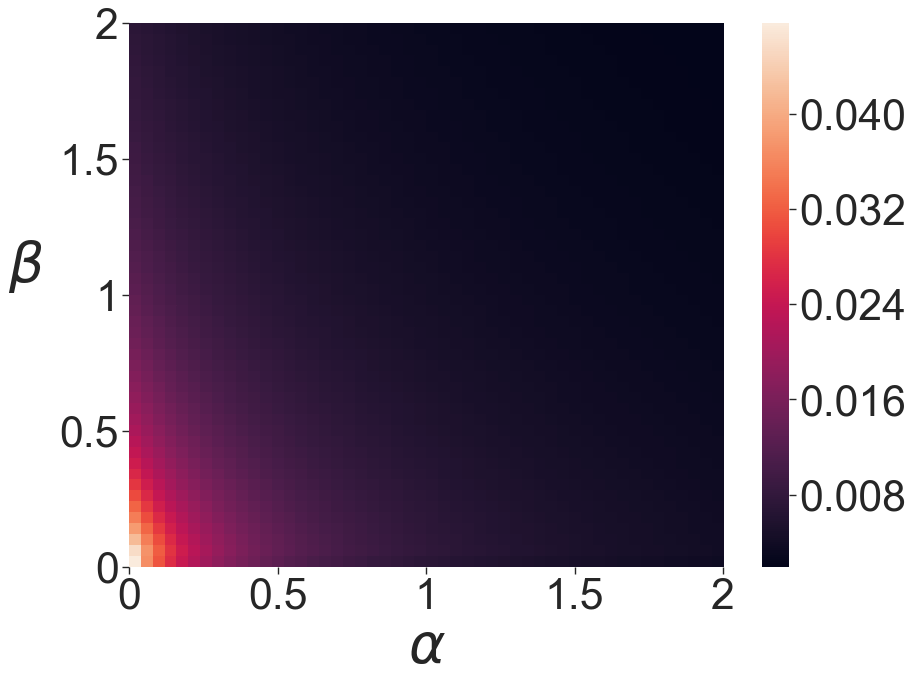

In [10]:
import matplotlib.ticker as ticker

figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
sns.set(font_scale=3.5)


xticks=[-0.5,0,0.5,1,1.5,2]
yticks=[2.5,2,1.5,1,0.5,0]

ax = sns.heatmap(Heat_Matrix, xticklabels=xticks, yticklabels=yticks)
ax.tick_params(left=True, bottom=True)

plt.xlabel("$\it{\u03B1}$", labelpad=5, fontsize=50)
plt.ylabel("$\it{\u03B2}$", labelpad=30, fontsize=50, rotation=0)
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 


ax.xaxis.set_major_locator(ticker.MultipleLocator(12.47))
ax.yaxis.set_major_locator(ticker.MultipleLocator(12.5))
plt.savefig('GAP',dpi=300, bbox_inches = "tight")
plt.show()